#**Import all necessary libraries**

In [2]:
#Import all the necessary libraries/dependencies for our project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

%matplotlib inline

#**Load the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Test_education/Thesis Project/Final documents/Raw datasets/Emotional drivers_dataset.csv')

In [5]:
#Inspecting the first five rows from the dataframe
df.head()

,Unnamed: 0,id,StartDate,EndDate,Duration__in_seconds_,infoconsent,sex,age,district,education,...,prosoc_EMO_avg,prosoc_DIR_avg,prosoc_COM_avg,prosoc_ANO_avg,antivacc1_R,antivacc7_R,antivacc9_R,antivacc10_R,status_R,vacc_emo_avg
0,0,00445320-bde3-11eb-ba16-1b6b7e4cc699,2021-05-26 10:06:24,2021-05-26 10:38:23,1918.0,"I have read the above, I agree and I am intere...",woman,34.0,Piešťany,high school,...,3.25,4.666667,5.0,3.6,2.0,5.0,4.0,2.0,1.0,4.000000
1,1,005cdfe0-bde3-11eb-b59d-35bad9e128c1,2021-05-26 07:40:25,2021-05-26 08:00:20,1194.0,"I have read the above, I agree and I am intere...",man,64.0,Dunajská Streda,"university (Mgr., Ing.)",...,3.75,4.000000,4.5,2.8,2.0,4.0,3.0,2.0,1.0,3.458333
2,2,00ab97b0-bde3-11eb-b8ab-51c90806ceff,2021-05-26 08:28:51,2021-05-26 09:05:17,2185.0,"I have read the above, I agree and I am intere...",woman,38.0,Košice II,"university (Mgr., Ing.)",...,3.00,3.666667,4.0,4.2,2.0,2.0,2.0,2.0,1.0,5.458333
3,3,00b72e40-bde3-11eb-b24c-c1bf9a458e97,2021-05-27 07:35:42,2021-05-27 07:53:56,1093.0,"I have read the above, I agree and I am intere...",woman,28.0,Žiar nad Hronom,"university (Mgr., Ing.)",...,2.50,3.333333,4.0,3.4,4.0,3.0,3.0,4.0,2.0,4.041667
4,4,013b6a00-bde3-11eb-8a64-01932a52efbb,2021-05-26 11:00:54,2021-05-26 11:14:49,835.0,"I have read the above, I agree and I am intere...",woman,29.0,Prievidza,"university (Mgr., Ing.)",...,3.00,3.000000,4.0,3.4,2.0,3.0,2.0,2.0,2.0,3.375000


In [6]:
#Ispecting the last five rows from the dataframe
df.tail()

,Unnamed: 0,id,StartDate,EndDate,Duration__in_seconds_,infoconsent,sex,age,district,education,...,prosoc_EMO_avg,prosoc_DIR_avg,prosoc_COM_avg,prosoc_ANO_avg,antivacc1_R,antivacc7_R,antivacc9_R,antivacc10_R,status_R,vacc_emo_avg
495,495,ff72f0b0-bde2-11eb-8a43-75924777de0b,2021-05-26 10:22:31,2021-05-26 11:29:13,4001.0,"I have read the above, I agree and I am intere...",man,52.0,Malacky,"university (Mgr., Ing.)",...,3.00,3.000000,4.0,3.0,4.0,5.0,3.0,4.0,1.0,5.500000
496,496,ffa46c50-bde2-11eb-b2f5-1feff9399661,2021-05-26 13:05:27,2021-05-26 13:23:07,1059.0,"I have read the above, I agree and I am intere...",man,47.0,Bratislava V,high school,...,3.50,3.666667,4.0,2.8,3.0,3.0,4.0,3.0,1.0,3.125000
497,497,ffdf3a40-bde2-11eb-ac58-b5862ed1bf56,2021-05-26 22:04:18,2021-05-26 22:27:38,1399.0,"I have read the above, I agree and I am intere...",woman,28.0,Nové Mesto nad Váhom,"university (Mgr., Ing.)",...,3.00,3.000000,4.0,3.8,5.0,2.0,1.0,1.0,2.0,2.375000
498,498,ffeb9040-bde2-11eb-82ad-67cd5b06947a,2021-05-26 18:33:41,2021-05-26 18:50:06,985.0,"I have read the above, I agree and I am intere...",man,56.0,Zvolen,"university (Mgr., Ing.)",...,2.75,2.666667,3.5,2.2,2.0,3.0,3.0,4.0,1.0,4.416667
499,499,fffdd770-bde2-11eb-b033-ad29791966c1,2021-05-26 09:43:23,2021-05-26 10:02:33,1150.0,"I have read the above, I agree and I am intere...",man,59.0,Prešov,high school without graduation,...,4.00,4.333333,4.5,3.6,4.0,5.0,5.0,4.0,1.0,5.125000


In [7]:
#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 500 rows and 195 columns.


In [8]:
#As we see there is two index column so we should drop on of them
df = df.drop('Unnamed: 0', axis=1)

In [9]:
#There are 195 columns for checking null values we can sum of all the null values
df.isnull().sum().sum()

805

In [10]:
#Find the missing value in the dataset
missing_values = df.isna().any()

# Display the name of the colume which have missing value
print(missing_values[missing_values == True].index.tolist())

['education_other', 'vaccovidX']


##**Statistical analysis for all features**

In [11]:
#To check the mean, standard deviation, and the quartile values and also the outlier
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration__in_seconds_,500.0,2763.968000,8486.388572,312.000000,959.750000,1312.500000,1892.500000,125001.000000
age,500.0,44.320000,15.656816,18.000000,32.000000,42.000000,58.000000,86.000000
household,500.0,2.980000,1.330843,1.000000,2.000000,3.000000,4.000000,9.000000
BFI_extra,500.0,3.241333,0.722744,1.166667,2.833333,3.166667,3.833333,5.000000
BFI_agree,500.0,3.690667,0.655961,1.333333,3.333333,3.666667,4.166667,5.000000
BFI_consc,500.0,3.774333,0.677777,1.500000,3.333333,3.833333,4.333333,5.000000
BFI_negem,500.0,2.795000,0.770134,1.000000,2.333333,2.833333,3.333333,5.000000
BFI_open,500.0,3.478667,0.647168,1.833333,3.000000,3.500000,3.875000,5.000000
HVIC_HC_avg,500.0,3.582500,0.731874,1.000000,3.000000,3.500000,4.000000,5.000000
HVIC_VC_avg,500.0,3.385500,0.700533,1.000000,3.000000,3.500000,3.750000,5.000000


In [12]:
#Prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 194 entries, id to vacc_emo_avg
dtypes: float64(43), object(151)
memory usage: 757.9+ KB


In [13]:
#To see the column names
df.columns

Index(['id', 'StartDate', 'EndDate', 'Duration__in_seconds_', 'infoconsent',
       'sex', 'age', 'district', 'education', 'education_other',
       ...
       'prosoc_EMO_avg', 'prosoc_DIR_avg', 'prosoc_COM_avg', 'prosoc_ANO_avg',
       'antivacc1_R', 'antivacc7_R', 'antivacc9_R', 'antivacc10_R', 'status_R',
       'vacc_emo_avg'],
      dtype='object', length=194)

In [14]:
#To check the data type
df.dtypes

id                        object
StartDate                 object
EndDate                   object
Duration__in_seconds_    float64
infoconsent               object
                          ...   
antivacc7_R              float64
antivacc9_R              float64
antivacc10_R             float64
status_R                 float64
vacc_emo_avg             float64
Length: 194, dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['StartDate'],format = '%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')

In [16]:
df['Date']

0      2021-05-26 10:06:24
1      2021-05-26 07:40:25
2      2021-05-26 08:28:51
3      2021-05-27 07:35:42
4      2021-05-26 11:00:54
              ...         
495    2021-05-26 10:22:31
496    2021-05-26 13:05:27
497    2021-05-26 22:04:18
498    2021-05-26 18:33:41
499    2021-05-26 09:43:23
Name: Date, Length: 500, dtype: object

In [17]:
df['Date'].value_counts()

2021-05-26 08:10:03    2
2021-05-26 07:28:53    2
2021-05-29 11:43:55    1
2021-05-29 14:34:45    1
2021-05-29 11:32:15    1
                      ..
2021-05-31 12:11:54    1
2021-05-26 15:31:46    1
2021-05-25 07:58:19    1
2021-05-31 12:18:17    1
2021-05-26 09:43:23    1
Name: Date, Length: 498, dtype: int64

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [19]:
df.head()

,id,StartDate,EndDate,Duration__in_seconds_,infoconsent,sex,age,district,education,education_other,...,prosoc_EMO_avg,prosoc_DIR_avg,prosoc_COM_avg,prosoc_ANO_avg,antivacc1_R,antivacc7_R,antivacc9_R,antivacc10_R,status_R,vacc_emo_avg
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-26 10:06:24,00445320-bde3-11eb-ba16-1b6b7e4cc699,2021-05-26 10:06:24,2021-05-26 10:38:23,1918.0,"I have read the above, I agree and I am intere...",woman,34.0,Piešťany,high school,NaN,...,3.25,4.666667,5.0,3.6,2.0,5.0,4.0,2.0,1.0,4.000000
2021-05-26 07:40:25,005cdfe0-bde3-11eb-b59d-35bad9e128c1,2021-05-26 07:40:25,2021-05-26 08:00:20,1194.0,"I have read the above, I agree and I am intere...",man,64.0,Dunajská Streda,"university (Mgr., Ing.)",NaN,...,3.75,4.000000,4.5,2.8,2.0,4.0,3.0,2.0,1.0,3.458333
2021-05-26 08:28:51,00ab97b0-bde3-11eb-b8ab-51c90806ceff,2021-05-26 08:28:51,2021-05-26 09:05:17,2185.0,"I have read the above, I agree and I am intere...",woman,38.0,Košice II,"university (Mgr., Ing.)",NaN,...,3.00,3.666667,4.0,4.2,2.0,2.0,2.0,2.0,1.0,5.458333
2021-05-27 07:35:42,00b72e40-bde3-11eb-b24c-c1bf9a458e97,2021-05-27 07:35:42,2021-05-27 07:53:56,1093.0,"I have read the above, I agree and I am intere...",woman,28.0,Žiar nad Hronom,"university (Mgr., Ing.)",NaN,...,2.50,3.333333,4.0,3.4,4.0,3.0,3.0,4.0,2.0,4.041667
2021-05-26 11:00:54,013b6a00-bde3-11eb-8a64-01932a52efbb,2021-05-26 11:00:54,2021-05-26 11:14:49,835.0,"I have read the above, I agree and I am intere...",woman,29.0,Prievidza,"university (Mgr., Ing.)",NaN,...,3.00,3.000000,4.0,3.4,2.0,3.0,2.0,2.0,2.0,3.375000


<Figure size 600x400 with 0 Axes>

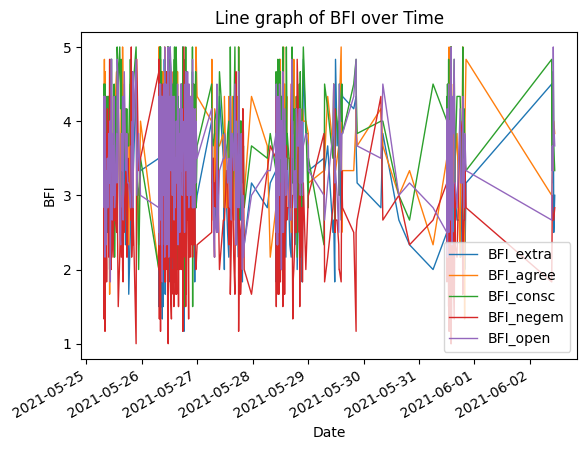

In [20]:
#Plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y=['BFI_extra','BFI_agree','BFI_consc','BFI_negem','BFI_open'], title='Line graph of BFI over Time', linewidth= 1)
plt.xlabel('Date')
plt.ylabel('BFI')
plt.yticks([1, 2, 3, 4, 5])  # Set y-axis ticks
plt.legend(['BFI_extra','BFI_agree','BFI_consc','BFI_negem','BFI_open'])  # Add legend labels
plt.show()

<Figure size 600x400 with 0 Axes>

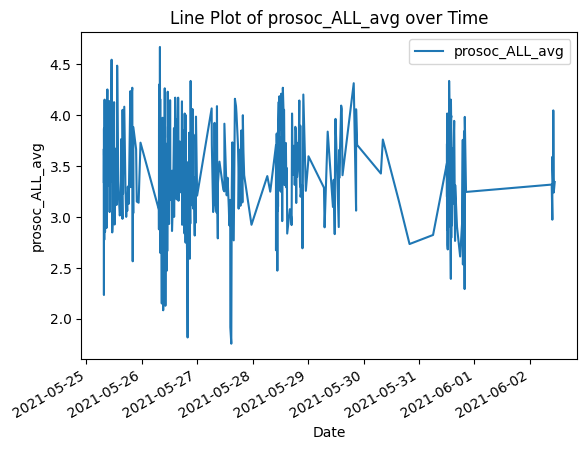

In [21]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y='prosoc_ALL_avg', title='Line Plot of prosoc_ALL_avg over Time')
plt.xlabel('Date')
plt.ylabel('prosoc_ALL_avg')
plt.show()

<Figure size 600x400 with 0 Axes>

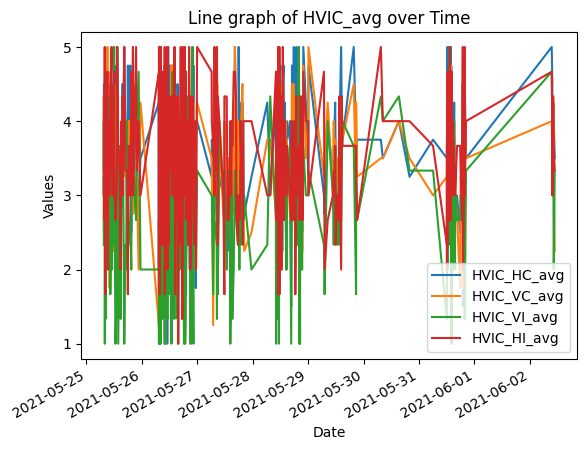

In [22]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y=['HVIC_HC_avg','HVIC_VC_avg','HVIC_VI_avg','HVIC_HI_avg'], title='Line graph of HVIC_avg over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.yticks([1, 2, 3, 4, 5])  # Set y-axis ticks
plt.legend(['HVIC_HC_avg','HVIC_VC_avg','HVIC_VI_avg','HVIC_HI_avg'])  # Add legend labels
plt.show()

<Figure size 600x400 with 0 Axes>

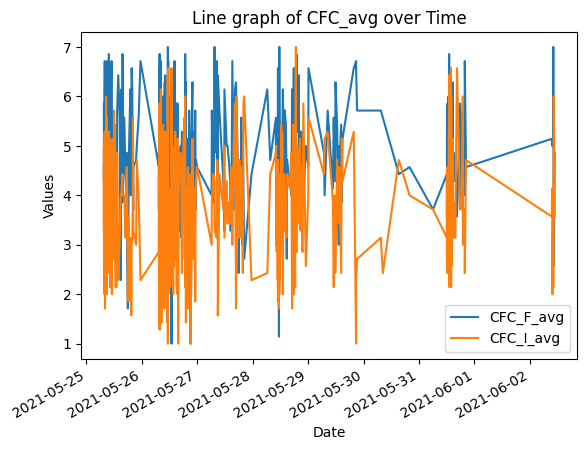

In [23]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y=['CFC_F_avg','CFC_I_avg'], title='Line graph of CFC_avg over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['CFC_F_avg','CFC_I_avg'])  # Add legend labels
plt.show()

<Figure size 600x400 with 0 Axes>

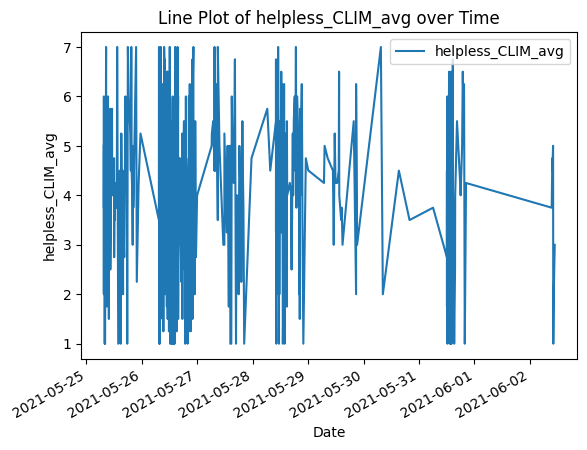

In [24]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y='helpless_CLIM_avg', title='Line Plot of helpless_CLIM_avg over Time')
plt.xlabel('Date')
plt.ylabel('helpless_CLIM_avg')
plt.show()

<Figure size 600x400 with 0 Axes>

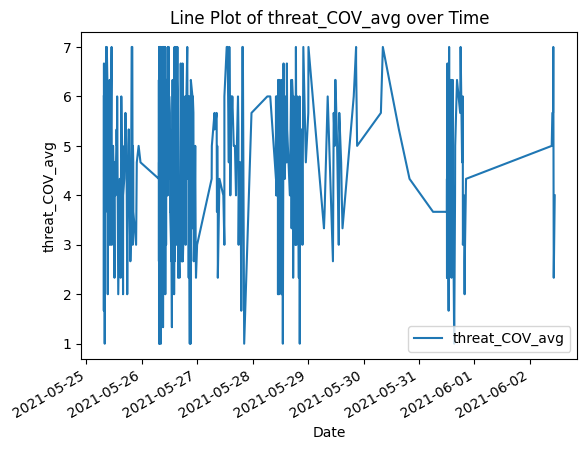

In [25]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y='threat_COV_avg', title='Line Plot of threat_COV_avg over Time')
plt.xlabel('Date')
plt.ylabel('threat_COV_avg')
plt.show()

<Figure size 600x400 with 0 Axes>

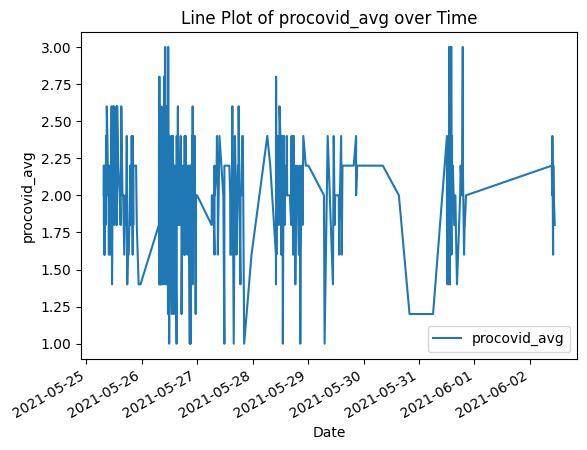

In [26]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y='procovid_avg', title='Line Plot of procovid_avg over Time')
plt.xlabel('Date')
plt.ylabel('procovid_avg')
plt.show()

<Figure size 600x400 with 0 Axes>

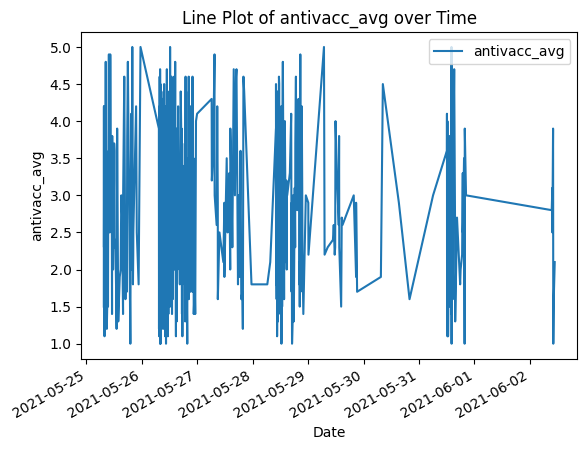

In [27]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y='antivacc_avg', title='Line Plot of antivacc_avg over Time')
plt.xlabel('Date')
plt.ylabel('antivacc_avg')
plt.show()

<Figure size 600x400 with 0 Axes>

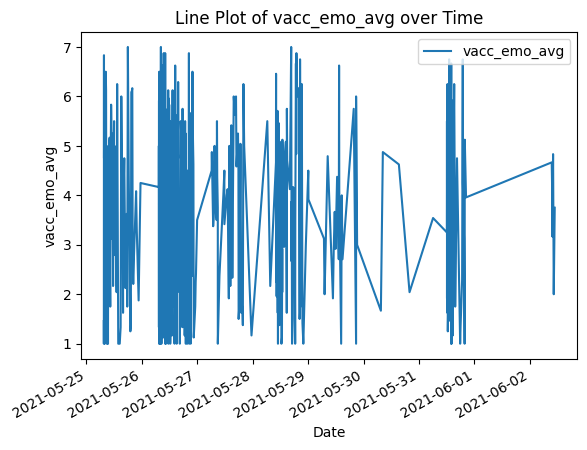

In [28]:
#plotting the avarage value in the graph
plt.figure(figsize=(6, 4))
df.plot(y='vacc_emo_avg', title='Line Plot of vacc_emo_avg over Time')
plt.xlabel('Date')
plt.ylabel('vacc_emo_avg')
plt.show()

#**Data Preprocessing**

#**Create a new dataframe named new_df using some selected feature**

In [29]:
#As there are lots of columns and there is also avarage value by combining some colums. So we drop those columns which have avarage value and also some unnecessary columns
new_df = df[['sex','age','education','conlib','religion','marital_status','household','BFI_extra','BFI_agree','BFI_consc','BFI_negem','BFI_open','HVIC_HC_avg','HVIC_VC_avg','HVIC_VI_avg','HVIC_HI_avg','prosoc_ALL_avg','CFC_F_avg','CFC_I_avg','helpless_CLIM_avg','helpless_COV_avg','helpless_VAC_avg','threat_COV_avg','threat_VAC_avg','threat_CLIM_avg','procovid_avg','proenviro_avg','provacc_avg','antivacc_avg','vacc_emo_avg']]

In [30]:
#Check number of rows and columns in the new dataset
print("The new dataset has %d rows and %d columns." % new_df.shape)

The new dataset has 500 rows and 30 columns.


In [31]:
# Now drop the index column
new_df.reset_index(drop=True, inplace=True)

In [32]:
#To check the the information about the dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                500 non-null    object 
 1   age                500 non-null    float64
 2   education          500 non-null    object 
 3   conlib             500 non-null    object 
 4   religion           500 non-null    object 
 5   marital_status     500 non-null    object 
 6   household          500 non-null    float64
 7   BFI_extra          500 non-null    float64
 8   BFI_agree          500 non-null    float64
 9   BFI_consc          500 non-null    float64
 10  BFI_negem          500 non-null    float64
 11  BFI_open           500 non-null    float64
 12  HVIC_HC_avg        500 non-null    float64
 13  HVIC_VC_avg        500 non-null    float64
 14  HVIC_VI_avg        500 non-null    float64
 15  HVIC_HI_avg        500 non-null    float64
 16  prosoc_ALL_avg     500 non

In [33]:
#To check the data type
new_df.dtypes

sex                   object
age                  float64
education             object
conlib                object
religion              object
marital_status        object
household            float64
BFI_extra            float64
BFI_agree            float64
BFI_consc            float64
BFI_negem            float64
BFI_open             float64
HVIC_HC_avg          float64
HVIC_VC_avg          float64
HVIC_VI_avg          float64
HVIC_HI_avg          float64
prosoc_ALL_avg       float64
CFC_F_avg            float64
CFC_I_avg            float64
helpless_CLIM_avg    float64
helpless_COV_avg     float64
helpless_VAC_avg     float64
threat_COV_avg       float64
threat_VAC_avg       float64
threat_CLIM_avg      float64
procovid_avg         float64
proenviro_avg        float64
provacc_avg          float64
antivacc_avg         float64
vacc_emo_avg         float64
dtype: object

In [34]:
#Checking for null values in the new dataset
new_df.isnull().sum()

sex                  0
age                  0
education            0
conlib               0
religion             0
marital_status       0
household            0
BFI_extra            0
BFI_agree            0
BFI_consc            0
BFI_negem            0
BFI_open             0
HVIC_HC_avg          0
HVIC_VC_avg          0
HVIC_VI_avg          0
HVIC_HI_avg          0
prosoc_ALL_avg       0
CFC_F_avg            0
CFC_I_avg            0
helpless_CLIM_avg    0
helpless_COV_avg     0
helpless_VAC_avg     0
threat_COV_avg       0
threat_VAC_avg       0
threat_CLIM_avg      0
procovid_avg         0
proenviro_avg        0
provacc_avg          0
antivacc_avg         0
vacc_emo_avg         0
dtype: int64

No null value contains in the dataset, so no need any data imputation tecnique.

##Statistical analysis for new dataframe



In [35]:
#To check the mean, standard deviation, and the quartile values and also the outlier
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,500.0,44.320000,15.656816,18.000000,32.000000,42.000000,58.000000,86.000000
household,500.0,2.980000,1.330843,1.000000,2.000000,3.000000,4.000000,9.000000
BFI_extra,500.0,3.241333,0.722744,1.166667,2.833333,3.166667,3.833333,5.000000
BFI_agree,500.0,3.690667,0.655961,1.333333,3.333333,3.666667,4.166667,5.000000
BFI_consc,500.0,3.774333,0.677777,1.500000,3.333333,3.833333,4.333333,5.000000
BFI_negem,500.0,2.795000,0.770134,1.000000,2.333333,2.833333,3.333333,5.000000
BFI_open,500.0,3.478667,0.647168,1.833333,3.000000,3.500000,3.875000,5.000000
HVIC_HC_avg,500.0,3.582500,0.731874,1.000000,3.000000,3.500000,4.000000,5.000000
HVIC_VC_avg,500.0,3.385500,0.700533,1.000000,3.000000,3.500000,3.750000,5.000000
HVIC_VI_avg,500.0,2.918667,0.880557,1.000000,2.333333,3.000000,3.333333,5.000000


#**Feature Engineering**

Target column comprise from 7 to 3

In [36]:
# Define custom bins
bins = [0, 2, 5, 7]

#labels = [1, 2, 3]

# Apply pd.cut() to the last column using iloc
#new_df.iloc[:, -1] = pd.cut(new_df.iloc[:, -1], bins=bins, labels=labels)

# Use pandas cut() function
new_df['vacc_emo_avg'] = pd.cut(new_df['vacc_emo_avg'], bins=bins, labels=[1, 2, 3])

<ipython-input-36-c6c9e6348ef9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['vacc_emo_avg'] = pd.cut(new_df['vacc_emo_avg'], bins=bins, labels=[1, 2, 3])


In [37]:
# To check the value of our target column value
new_df['vacc_emo_avg']

0      2
1      2
2      3
3      2
4      2
      ..
495    3
496    2
497    2
498    2
499    3
Name: vacc_emo_avg, Length: 500, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [38]:
#To see the number of target column variable
new_df['vacc_emo_avg'].value_counts()

2    273
1    121
3    106
Name: vacc_emo_avg, dtype: int64

In [39]:
#To check the datatype of our target column
new_df['vacc_emo_avg'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=True)

In [40]:
#Now change the type of target variable into integer
new_df['vacc_emo_avg'] = new_df['vacc_emo_avg'].astype(int)

<ipython-input-40-1795fa0ea39e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['vacc_emo_avg'] = new_df['vacc_emo_avg'].astype(int)


In [41]:
#To check the datatype of our target column
new_df['vacc_emo_avg'].dtypes

dtype('int64')

#**Exploratory Data Analysis(EDA)**

#**Histogram for the target column**

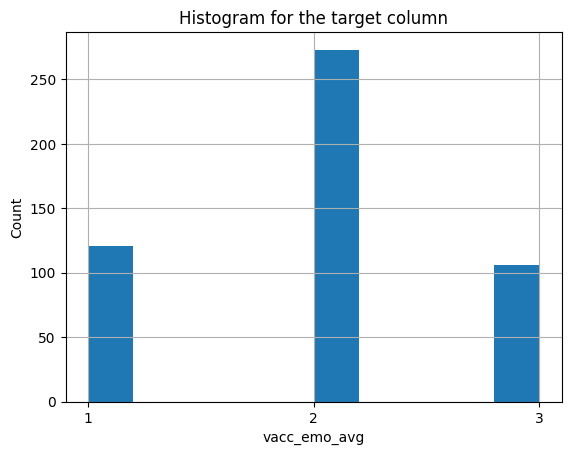

In [42]:
# Plot a histogram of the column 'vacc_emo_avg'
new_df['vacc_emo_avg'].hist()
plt.title("Histogram for the target column")
plt.xlabel('vacc_emo_avg')
plt.ylabel('Count')
plt.xticks([1, 2, 3])
# display the plot
plt.show()

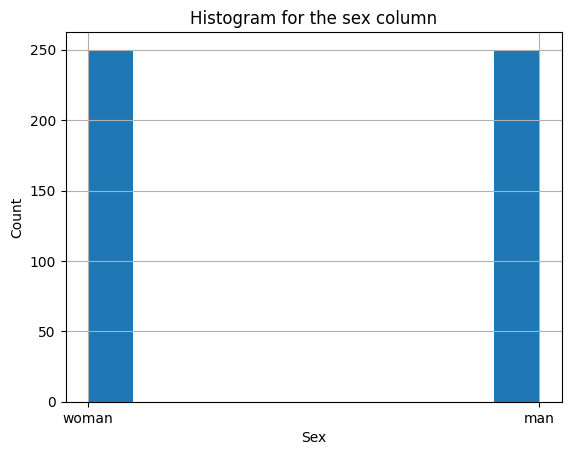

In [43]:
# Plot a histogram of the column 'sex'
new_df['sex'].hist()
plt.title("Histogram for the sex column")
plt.xlabel('Sex')
plt.ylabel('Count')
# display the plot
plt.show()

In [44]:
new_df['religion'].value_counts()

1 - religion is not important to me at all    106
7 -  religion is very important to me          81
4                                              73
5                                              71
6                                              67
2                                              53
3                                              49
Name: religion, dtype: int64

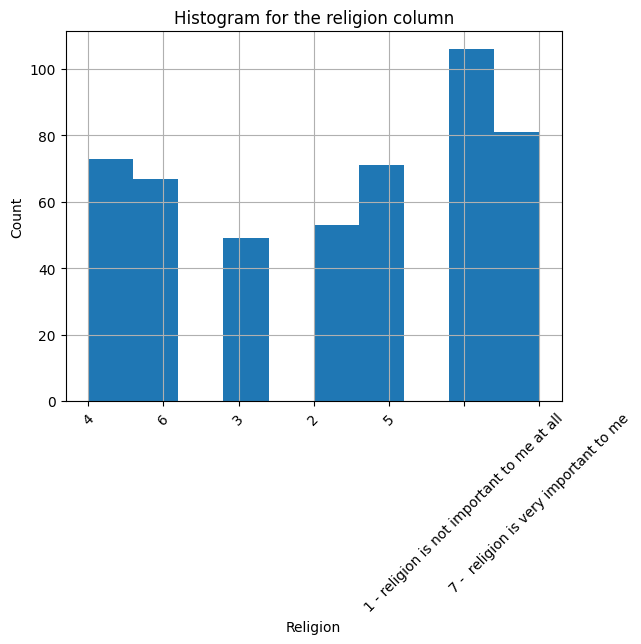

In [45]:
# Plot a histogram of the column 'marital_status'
new_df['religion'].hist()
plt.title("Histogram for the religion column")
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=45)
# display the plot
plt.show()

In [46]:
new_df['marital_status'].value_counts()

married          248
single           181
divorced          54
widow/widower     17
Name: marital_status, dtype: int64

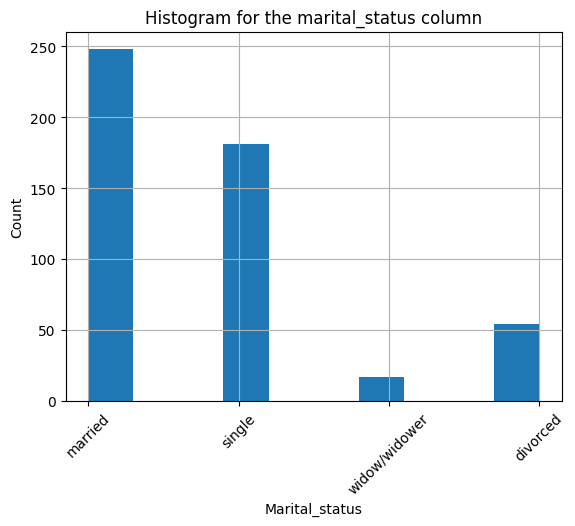

In [47]:
# Plot a histogram of the column 'marital_status'
new_df['marital_status'].hist()
plt.title("Histogram for the marital_status column")
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.xticks(rotation=45)
# display the plot
plt.show()

In [48]:
new_df['education'].value_counts()

high school                       231
university (Mgr., Ing.)           159
high school without graduation     55
university (Bc.)                   28
university (PhD.)                  12
primary school                     12
other: _____                        3
Name: education, dtype: int64

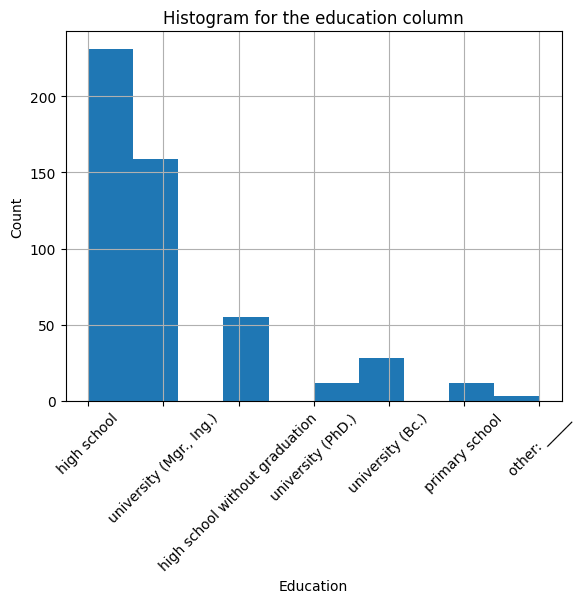

In [49]:
# Plot a histogram of the column 'marital_status'
new_df['education'].hist()
plt.title("Histogram for the education column")
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
# display the plot
plt.show()

In [50]:
new_df['conlib'].value_counts()

4                        221
3                        102
5                         68
2                         48
6                         33
7 - very liberal          15
1 - very conservative     13
Name: conlib, dtype: int64

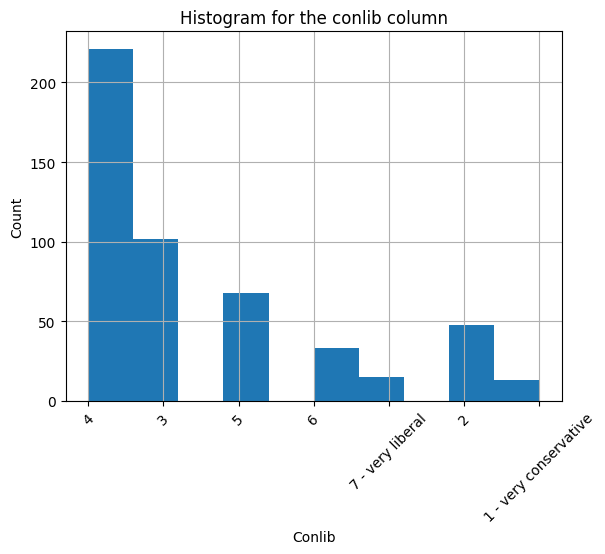

In [51]:
# Plot a histogram of the column 'marital_status'
new_df['conlib'].hist()
plt.title("Histogram for the conlib column")
plt.xlabel('Conlib')
plt.ylabel('Count')
plt.xticks(rotation=45)
# display the plot
plt.show()

##**Count plot to see the age distribution**

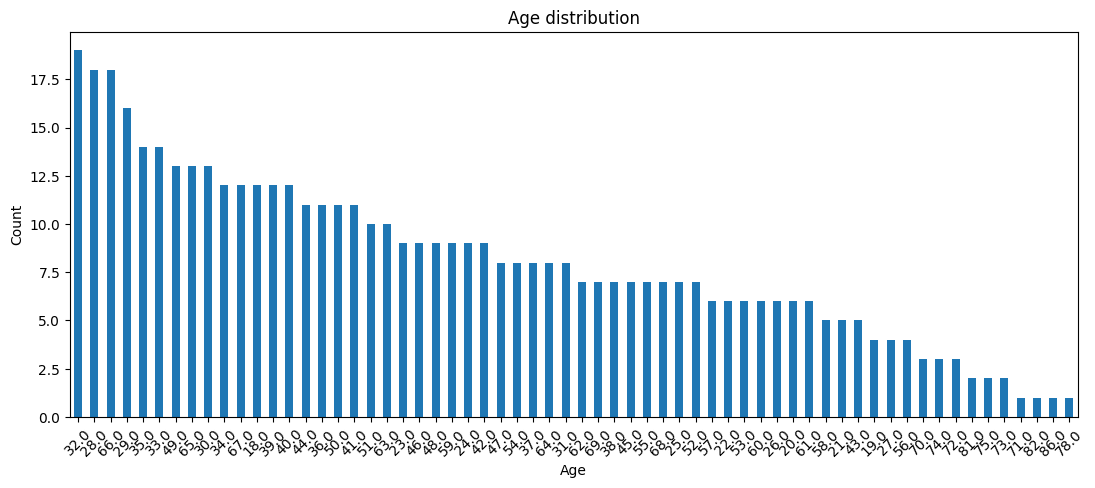

In [52]:
# create a count plot of the column 'age'
ax = df['age'].value_counts().plot(kind='bar', rot=45, figsize=(13, 5))
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
# display the plot
plt.show()

#**Scatter plot**

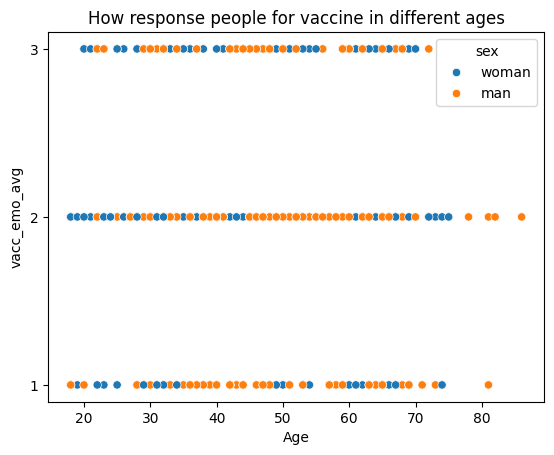

In [53]:
#To draw a scatter plot
sns.scatterplot(x=new_df['age'], y=new_df['vacc_emo_avg'], hue=new_df['sex'])
plt.title('How response people for vaccine in different ages')
plt.xlabel('Age')
plt.ylabel('vacc_emo_avg')
plt.yticks([1, 2, 3])
plt.show()

<Figure size 1000x600 with 0 Axes>

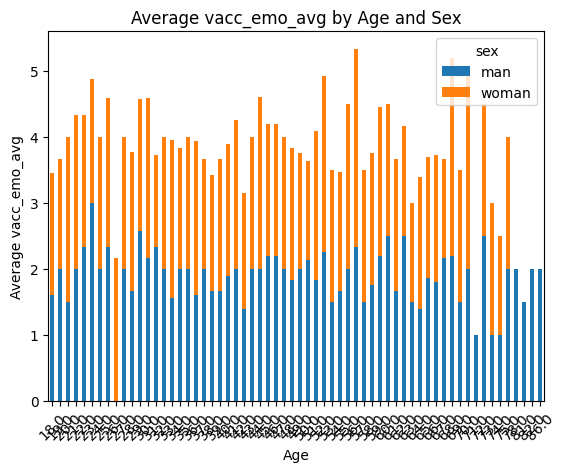

In [54]:
# Assuming you have a DataFrame named 'new_df'
grouped_df = new_df.groupby(['age', 'sex'])['vacc_emo_avg'].mean().unstack()

# Create a grouped bar chart with a custom figure size
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True)
plt.title('Average vacc_emo_avg by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Average vacc_emo_avg')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

#**Pie chart**

In [55]:
#To know the household member distribution
new_df['household'].value_counts()

2.0    152
3.0    137
4.0    106
1.0     52
5.0     31
6.0     15
7.0      3
8.0      3
9.0      1
Name: household, dtype: int64

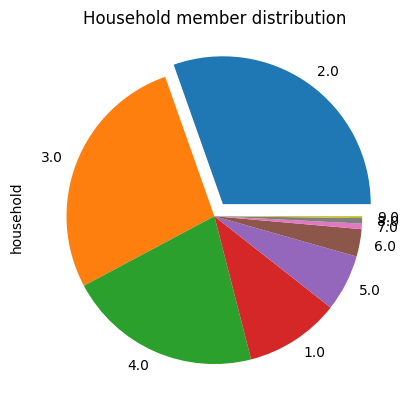

In [56]:
# create a pie chart of the column 'household'
df['household'].value_counts().plot(kind='pie', explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0])

# set the title
plt.title('Household member distribution')

# display the plot
plt.show()

In [57]:
#To know the household member distribution
new_df['conlib'].value_counts()

4                        221
3                        102
5                         68
2                         48
6                         33
7 - very liberal          15
1 - very conservative     13
Name: conlib, dtype: int64

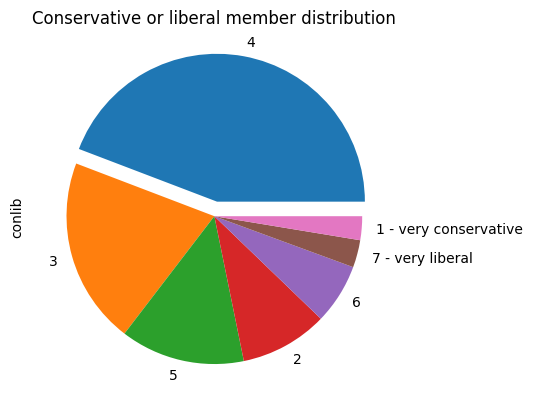

In [58]:
# create a pie chart of the column 'household'
df['conlib'].value_counts().plot(kind='pie', explode=[0.1, 0, 0, 0, 0, 0, 0])

# set the title
plt.title('Conservative or liberal member distribution')

# display the plot
plt.show()

#**Now convert cetegorical values into numeric**

In [59]:
# Find columns which have object type data
object_columns = new_df.select_dtypes(include=['object']).columns.tolist()

# Display the columns name which data type object
print(object_columns)

['sex', 'education', 'conlib', 'religion', 'marital_status']


In [60]:
#Checking the distribution of cetegorical data
print(new_df.sex.value_counts())
print('*'*50)
print(new_df.education.value_counts())
print('*'*50)
print(new_df.conlib.value_counts())
print('*'*50)
print(new_df.religion.value_counts())
print('*'*50)
print(new_df.marital_status.value_counts())

woman    250
man      250
Name: sex, dtype: int64
**************************************************
high school                       231
university (Mgr., Ing.)           159
high school without graduation     55
university (Bc.)                   28
university (PhD.)                  12
primary school                     12
other: _____                        3
Name: education, dtype: int64
**************************************************
4                        221
3                        102
5                         68
2                         48
6                         33
7 - very liberal          15
1 - very conservative     13
Name: conlib, dtype: int64
**************************************************
1 - religion is not important to me at all    106
7 -  religion is very important to me          81
4                                              73
5                                              71
6                                              67
2                    

In [61]:
#Encoding "sex" column
new_df['sex'] = new_df['sex'].apply(lambda x: 0 if x == 'woman' else 1)

#Encoding "marital_status" column
new_df['marital_status'] = new_df['marital_status'].apply(lambda x: 0 if x == 'married' else (1 if x == 'single' else (2 if x == 'divorced' else 3)))

#Encoding "education" column
new_df['education'] = new_df['education'].apply(lambda x: 0 if x == 'high school' else (1 if x == 'university (Mgr., Ing.)' else (2 if x == 'high school without graduation' else (3 if x == 'university (Bc.)' else (4 if x == 'university (PhD.)' else (5 if x == 'primary school' else 6))))))

#Encoding "conlib" column
new_df['conlib'] = new_df['conlib'].apply(lambda x: 3 if x == '4' else (2 if x == '3' else (4 if x == '5' else (1 if x == '2' else (5 if x == '6' else (6 if x == '7 - very liberal' else 0))))))

#Encoding "religion" column
new_df['religion'] = new_df['religion'].apply(lambda x: 0 if x == '1 - religion is not important to me at all' else (6 if x == '7 -  religion is very important to me' else (3 if x == '4' else (4 if x == '5' else (5 if x == '6' else (1 if x == '2' else 2))))))

<ipython-input-61-a377d9a53e6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sex'] = new_df['sex'].apply(lambda x: 0 if x == 'woman' else 1)
<ipython-input-61-a377d9a53e6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['marital_status'] = new_df['marital_status'].apply(lambda x: 0 if x == 'married' else (1 if x == 'single' else (2 if x == 'divorced' else 3)))
<ipython-input-61-a377d9a53e6b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [62]:
#Check the data type of this object column after encoding
new_df[['sex', 'education', 'conlib', 'religion', 'marital_status']].dtypes

sex               int64
education         int64
conlib            int64
religion          int64
marital_status    int64
dtype: object

In [63]:
#Checking the distribution of cetegorical data
print(new_df.sex.value_counts())
print('*'*50)
print(new_df.education.value_counts())
print('*'*50)
print(new_df.conlib.value_counts())
print('*'*50)
print(new_df.religion.value_counts())
print('*'*50)
print(new_df.marital_status.value_counts())

0    250
1    250
Name: sex, dtype: int64
**************************************************
0    231
1    159
2     55
3     28
4     12
5     12
6      3
Name: education, dtype: int64
**************************************************
3    221
2    102
4     68
1     48
5     33
6     15
0     13
Name: conlib, dtype: int64
**************************************************
0    106
6     81
3     73
4     71
5     67
1     53
2     49
Name: religion, dtype: int64
**************************************************
0    248
1    181
2     54
3     17
Name: marital_status, dtype: int64


#**Data normalization using MinMaxScaler**

In [64]:
#Normalize the dataset using MinMaxScaler function
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
new_df[['sex', 'age', 'education', 'conlib', 'religion', 'marital_status',
       'household', 'BFI_extra', 'BFI_agree', 'BFI_consc', 'BFI_negem',
       'BFI_open', 'HVIC_HC_avg', 'HVIC_VC_avg', 'HVIC_VI_avg', 'HVIC_HI_avg',
       'prosoc_ALL_avg', 'CFC_F_avg', 'CFC_I_avg', 'helpless_CLIM_avg',
       'helpless_COV_avg', 'helpless_VAC_avg', 'threat_COV_avg',
       'threat_VAC_avg', 'threat_CLIM_avg', 'procovid_avg', 'proenviro_avg',
       'provacc_avg', 'antivacc_avg']] = scaler.fit_transform(new_df[['sex', 'age', 'education', 'conlib', 'religion', 'marital_status',
       'household', 'BFI_extra', 'BFI_agree', 'BFI_consc', 'BFI_negem',
       'BFI_open', 'HVIC_HC_avg', 'HVIC_VC_avg', 'HVIC_VI_avg', 'HVIC_HI_avg',
       'prosoc_ALL_avg', 'CFC_F_avg', 'CFC_I_avg', 'helpless_CLIM_avg',
       'helpless_COV_avg', 'helpless_VAC_avg', 'threat_COV_avg',
       'threat_VAC_avg', 'threat_CLIM_avg', 'procovid_avg', 'proenviro_avg',
       'provacc_avg', 'antivacc_avg']])

<ipython-input-64-939c04ec0c83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['sex', 'age', 'education', 'conlib', 'religion', 'marital_status',


In [65]:
# round the values in each column to 4 decimal places
new_df = new_df.round(4)

In [66]:
#Check the dataset after normalization
new_df.head(10)

,sex,age,education,conlib,religion,marital_status,household,BFI_extra,BFI_agree,BFI_consc,...,helpless_COV_avg,helpless_VAC_avg,threat_COV_avg,threat_VAC_avg,threat_CLIM_avg,procovid_avg,proenviro_avg,provacc_avg,antivacc_avg,vacc_emo_avg
0,0.0,0.2353,0.0000,0.5000,0.5000,0.0000,0.500,0.5217,0.8182,0.6667,...,0.3750,0.5000,0.5000,0.5000,0.5000,0.7,0.70,0.375,0.450,2
1,1.0,0.6765,0.1667,0.3333,0.8333,0.0000,0.125,0.7391,0.8636,0.8095,...,0.2917,0.2083,0.5000,0.6111,0.6667,0.9,1.00,0.250,0.575,2
2,0.0,0.2941,0.1667,0.3333,0.5000,0.0000,0.375,0.5652,0.8636,0.7619,...,0.6250,0.7083,0.6667,0.7778,0.6667,0.7,0.50,0.375,0.325,3
3,0.0,0.1471,0.1667,0.5000,0.3333,0.3333,0.125,0.4783,0.7727,0.7143,...,0.5833,0.6250,0.7222,0.3889,0.5556,0.5,0.30,0.375,0.500,2
4,0.0,0.1618,0.1667,0.6667,0.1667,0.3333,0.250,0.4783,0.6818,0.7143,...,0.3750,0.2917,0.6667,0.5000,0.7778,0.6,0.55,0.250,0.325,2
5,0.0,0.1471,0.3333,0.5000,0.6667,0.3333,0.375,0.7826,0.7273,0.9524,...,0.7500,0.7917,0.7778,1.0000,0.8333,0.7,0.40,0.375,0.475,3
6,0.0,0.2353,0.1667,0.6667,0.0000,0.3333,0.000,0.2609,0.3636,0.3810,...,0.1667,0.1667,0.5000,0.5000,0.5556,0.6,0.30,0.500,0.200,2
7,1.0,0.3235,0.0000,0.5000,0.6667,0.0000,0.250,0.6957,0.7273,0.7143,...,0.3333,0.3333,0.6111,0.3333,0.6111,0.6,0.65,0.250,0.500,2
8,1.0,0.4559,0.3333,0.5000,0.8333,0.0000,0.125,0.4348,0.5455,0.4762,...,0.6250,0.7083,0.7222,0.7222,0.7222,0.5,0.35,0.500,0.350,3
9,1.0,0.9265,0.1667,0.5000,0.8333,1.0000,0.125,0.5217,0.4091,0.4286,...,0.1250,0.0000,1.0000,0.0000,0.5000,0.5,0.55,0.750,0.000,1


In [67]:
#To see some information about the new dataframe afer nornalization
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                500 non-null    float64
 1   age                500 non-null    float64
 2   education          500 non-null    float64
 3   conlib             500 non-null    float64
 4   religion           500 non-null    float64
 5   marital_status     500 non-null    float64
 6   household          500 non-null    float64
 7   BFI_extra          500 non-null    float64
 8   BFI_agree          500 non-null    float64
 9   BFI_consc          500 non-null    float64
 10  BFI_negem          500 non-null    float64
 11  BFI_open           500 non-null    float64
 12  HVIC_HC_avg        500 non-null    float64
 13  HVIC_VC_avg        500 non-null    float64
 14  HVIC_VI_avg        500 non-null    float64
 15  HVIC_HI_avg        500 non-null    float64
 16  prosoc_ALL_avg     500 non

#**Creating a Heatmap to see the corelation of all the feature(30 columns)**

In [68]:
#Assign correlation function
correlation= new_df.corr()
new_df.corr()

,sex,age,education,conlib,religion,marital_status,household,BFI_extra,BFI_agree,BFI_consc,...,helpless_COV_avg,helpless_VAC_avg,threat_COV_avg,threat_VAC_avg,threat_CLIM_avg,procovid_avg,proenviro_avg,provacc_avg,antivacc_avg,vacc_emo_avg
sex,1.000000,0.092840,0.011269,-0.036172,-0.021535,-0.175333,0.024069,-0.014776,-0.078333,-0.003443,...,-0.137297,-0.091525,-0.121782,-0.046393,-0.108314,-0.139568,0.000598,0.070735,-0.013824,-0.068338
age,0.092840,1.000000,-0.095108,-0.181768,-0.055191,-0.002175,-0.334866,0.065801,0.157207,0.127325,...,-0.045524,-0.054462,-0.056233,-0.018494,-0.024078,0.034640,0.118956,0.111584,-0.061643,-0.057216
education,0.011269,-0.095108,1.000000,0.135756,-0.031685,0.004580,0.004331,0.001269,-0.026191,-0.016393,...,0.000121,-0.065956,-0.011890,-0.054920,-0.036407,-0.001286,-0.036717,0.062588,-0.115630,-0.063684
conlib,-0.036172,-0.181768,0.135756,1.000000,-0.250931,0.087408,-0.096695,-0.068345,-0.044621,-0.026120,...,-0.013950,-0.125356,-0.009418,-0.163598,0.084945,0.073723,-0.044482,0.150853,-0.209725,-0.138652
religion,-0.021535,-0.055191,-0.031685,-0.250931,1.000000,-0.018765,0.171472,0.100107,0.168491,0.094983,...,0.092226,0.121797,0.127000,0.120496,0.138854,0.165606,0.097059,-0.014906,0.063858,0.117183
marital_status,-0.175333,-0.002175,0.004580,0.087408,-0.018765,1.000000,-0.226452,-0.014616,-0.090422,-0.066973,...,-0.017906,0.035949,0.038356,0.039852,-0.051184,-0.042161,-0.046037,-0.125610,0.095729,0.030518
household,0.024069,-0.334866,0.004331,-0.096695,0.171472,-0.226452,1.000000,0.045288,0.106535,-0.029814,...,0.108346,0.122900,-0.016537,0.097067,0.066811,0.024976,0.040806,-0.068176,0.096535,0.108835
BFI_extra,-0.014776,0.065801,0.001269,-0.068345,0.100107,-0.014616,0.045288,1.000000,0.198986,0.428795,...,0.003738,0.091358,0.027857,0.051994,0.035069,0.142651,0.097604,0.046804,0.100499,0.079367
BFI_agree,-0.078333,0.157207,-0.026191,-0.044621,0.168491,-0.090422,0.106535,0.198986,1.000000,0.419758,...,-0.017799,-0.047968,-0.008682,-0.034893,0.066525,0.292967,0.197500,0.060774,-0.029117,-0.079974
BFI_consc,-0.003443,0.127325,-0.016393,-0.026120,0.094983,-0.066973,-0.029814,0.428795,0.419758,1.000000,...,-0.083262,-0.075220,-0.021440,-0.053259,0.016946,0.222091,0.203862,0.125150,-0.060886,-0.070434


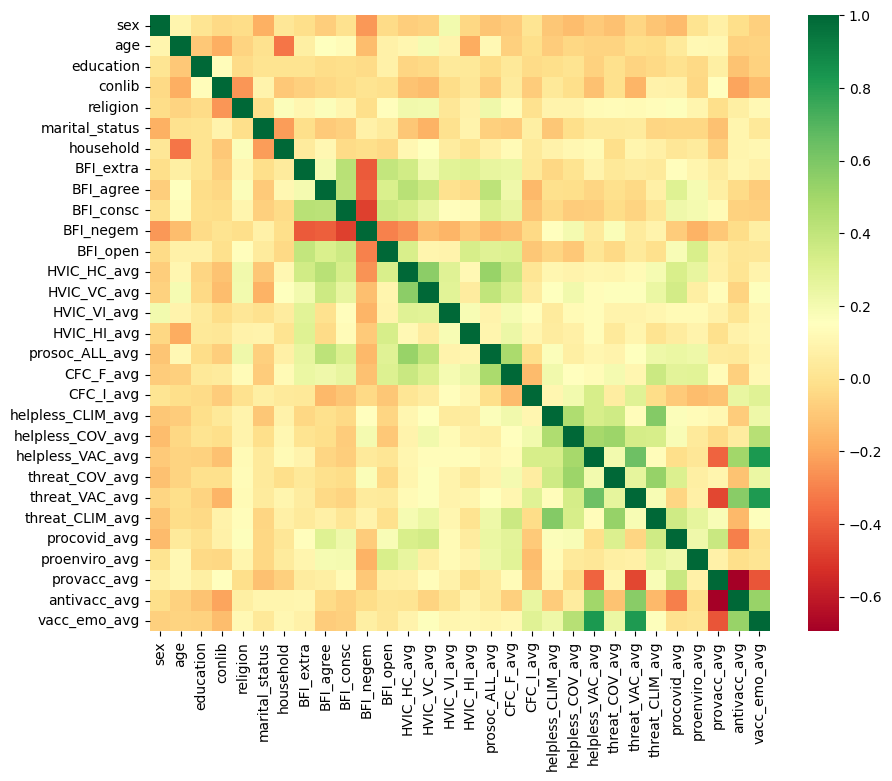

In [69]:
#Plot the heatmap with a figure size of 10x8 inches
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap="RdYlGn", annot=False)
plt.show()

#**Model Evaluation**

#**K-Fold cross validation for all 30 features**

In [70]:
#Now split the dataset into train test set

X = new_df.drop(['vacc_emo_avg'], axis=1)
y = new_df['vacc_emo_avg']

In [71]:
#Convert X, y into numpy array
X1 = np.asarray(X)
Y1 = np.asarray(y)

**********************

**The classifier that we use in k-fold cross validation**

In k-fold cross validation we use

1.   Linear svm
2.   Radial svm
3.   LogisticRegression
4.   KNeighbourClassifier
5.   Decisiontreeclassifier
6.   GradiantBoostingClassifier
7.   RandomForestClassifier
8.   Naive bayes

#**For 5 fold cross validation**

In [72]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True) # k=5 splits the data into 5 equal parts

In [73]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNeighborClassifier',
             'Decision Tree','Random forest', 'Naive Bayes', 'Gradient Boosting']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42),
        GaussianNB(),
        GradientBoostingClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X1, Y1, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(round(cv_result.mean(), 4))  # Rounding to 4 decimal places
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Gradient Boosting,0.980
Decision Tree,0.942
Random forest,0.930
Linear Svm,0.926
Logistic Regression,0.914
Naive Bayes,0.902
Radial Svm,0.892
KNeighborClassifier,0.782


***************

#**For 10 fold cross validation**

In [74]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [75]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNeighborClassifier',
             'Decision Tree','Random forest', 'Naive Bayes', 'Gradient Boosting']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42),
        GaussianNB(),
        GradientBoostingClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X1, Y1, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(round(cv_result.mean(), 4))  # Rounding to 4 decimal places
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Gradient Boosting,0.982
Decision Tree,0.970
Logistic Regression,0.922
Random forest,0.922
Linear Svm,0.918
Radial Svm,0.902
Naive Bayes,0.890
KNeighborClassifier,0.770


***************

#**For 15 fold cross validation**

In [76]:
kfold = KFold(n_splits=15, random_state=42, shuffle=True) # k=15 splits the data into 15 equal parts

In [77]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNeighborClassifier',
             'Decision Tree','Random forest', 'Naive Bayes', 'Gradient Boosting']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42),
        GaussianNB(),
        GradientBoostingClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X1, Y1, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(round(cv_result.mean(), 4))  # Rounding to 4 decimal places
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Gradient Boosting,0.9819
Decision Tree,0.9599
Random forest,0.9342
Linear Svm,0.9223
Logistic Regression,0.9143
Radial Svm,0.8983
Naive Bayes,0.8922
KNeighborClassifier,0.7743


***************

**Put accuracy score and make a box plot**

In [78]:
#Creating a dataframe
box=pd.DataFrame(accuracy,index=[classifiers])

#Transpose the dataframe
boxT = box.T

<ipython-input-79-279be4b43f20>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classifiers)


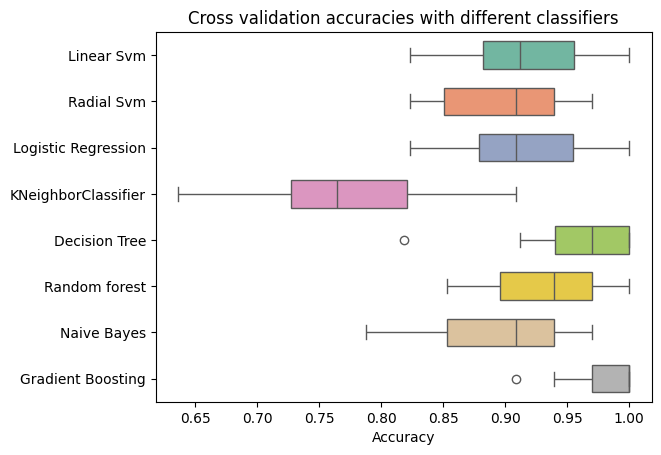

In [79]:
#Creating box plot
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

******************

##**Holdout method**

# **Split dataset into train and test to fed the Model**

**Spliting dataset into 85:15 ratio**

In [80]:
#Spliting the dataset into 85% and 15% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify=y, random_state = 42)

In [81]:
#Now check the shape of each part
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(425, 29)
(425,)
(75, 29)
(75,)


### **Compare different model accuracies with 85:15 ratio**

In [82]:
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy_scores.append(round(metrics.accuracy_score(prediction, y_test), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Gradient Boosting,0.9733
Linear Svm,0.9200
Decision Tree,0.9067
Random forest,0.8933
Logistic Regression,0.8533
Radial Svm,0.8400
Naive Bayes,0.8133
KNeighborsClassifier,0.8000


**Spliting dataset into 80:20 ratio**

In [83]:
#Spliting the dataset into 80% and 20% ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [84]:
#Now check the shape of each part
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(400, 29)
(400,)
(100, 29)
(100,)


### **Compare different model accuracies with 80:20 ratio**

In [93]:
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X_train1, y_train1)
    prediction1 = model.predict(X_test1)
    accuracy_scores.append(round(metrics.accuracy_score(prediction1, y_test1), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Gradient Boosting,0.97
Decision Tree,0.93
Linear Svm,0.91
Logistic Regression,0.90
Random forest,0.89
Radial Svm,0.88
Naive Bayes,0.86
KNeighborsClassifier,0.84


**Spliting dataset into 70:30 ratio**

In [ ]:
#Spliting the dataset into 80% and 20% ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
#Now check the shape of each part
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(350, 29)
(350,)
(150, 29)
(150,)


### **Compare different model accuracies with 70:30 ratio**

In [ ]:
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X_train2, y_train2)
    prediction2 = model.predict(X_test2)
    accuracy_scores.append(round(metrics.accuracy_score(prediction2, y_test2), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Gradient Boosting,0.9800
Decision Tree,0.9267
Random forest,0.9133
Linear Svm,0.9000
Logistic Regression,0.8800
Radial Svm,0.8533
Naive Bayes,0.8533
KNeighborsClassifier,0.8200


Here we implement six models to see their f1_score, rmse score, accuracy score, confusion metrix and classification report. The models are below,

1.   Gradiant boosting classifier
2.   Decision tree classifier
3.   K-Neighbor classifier   
4.   Support vector classifier
5.   Random forest classifier
6.   Naive Bayes classifier



******************************************

#**First model: Gradient Boosting Classifier with 30 features**

In [ ]:
#Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

#Train classifier using all features
gbc.fit(X_train, y_train)

#Make predictions
y_pred_gbc = gbc.predict(X_test)

#Evaluate the model using the f1-score
f1_score_y_test_gbc = round(f1_score(y_test, y_pred_gbc, average='weighted'), 4)

In [ ]:
# Make predictions on the training data
y_pred_train_gbc = gbc.predict(X_train)

# Evaluate the model using the f1-score
f1_score_y_train_gbc = round(f1_score(y_train, y_pred_train_gbc, average='weighted'), 4)

**Classification report:**


In [ ]:
#To creat a classification report
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.95      1.00      0.98        41
           3       1.00      0.94      0.97        16

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y_test, y_pred_gbc)
cm

array([[17,  1,  0],
       [ 0, 41,  0],
       [ 0,  1, 15]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y_test, y_pred_gbc)
rmse = np.sqrt(mse)
print('Test set rmse score applying on GradientBoostingClassifier: {:.4f}'.format(rmse))

Test set rmse score applying on GradientBoostingClassifier: 0.1633


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using GradientBoostingClassifier: {:.4f}'.format(f1_score_y_train_gbc))
print('Test set f1 score using GradientBoostingClassifier: {:.4f}'.format(f1_score_y_test_gbc))

Train set f1 score using GradientBoostingClassifier: 1.0000
Test set f1 score using GradientBoostingClassifier: 0.9732


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using GradientBoostingClassifier : {:.4f}'.format(accuracy_score(y_train, y_pred_train_gbc)))
print('Test set score using GradientBoostingClassifier : {:.4f}'.format(accuracy_score(y_test, y_pred_gbc)))

Train set score using GradientBoostingClassifier : 1.0000
Test set score using GradientBoostingClassifier : 0.9733


******************************************

#**Second model: DecisionTreeClassifier with 30 features**

In [ ]:
#Setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
#The Gini impurity measure is one of the methods used in decision tree algorithms to decide the optimal split from a root node, and subsequent splits.
dtc_gini = DecisionTreeClassifier(max_depth=7, random_state=42)

#Train classifier using all features
dtc_gini.fit(X_train, y_train)

# Getting some predictions from the testing set
y_pred_dtc = dtc_gini.predict(X_test)

#Evaluate the model using the f1-score
f1_score_y_test_dtc =round(f1_score(y_test, y_pred_dtc, average='weighted'), 4)

In [ ]:
# Getting some predictions from the training set
y_pred_train_dtc = dtc_gini.predict(X_train)

# Evaluate the model using the f1-score
f1_score_y_train_dtc = round(f1_score(y_train, y_pred_train_dtc, average='weighted'), 4)

**Classification report:**

In [ ]:
#To creat a classification report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           2       0.87      0.98      0.92        41
           3       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.93      0.87      0.90        75
weighted avg       0.91      0.91      0.91        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)
cm

array([[16,  2,  0],
       [ 0, 40,  1],
       [ 0,  4, 12]])

**Error function**

In [ ]:
#To find the rmse
mse = metrics.mean_squared_error(y_test, y_pred_dtc)
rmse = np.sqrt(mse)
print('Test set rmse score applying on decessiontreeclassifier: {:.4f}'.format(rmse))

Test set rmse score applying on decessiontreeclassifier: 0.3055


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using KNeighborsClassifier: {:.4f}'.format(f1_score_y_train_dtc))
print('Test set f1 score using KNeighborsClassifier: {:.4f}'.format(f1_score_y_test_dtc))

Train set f1 score using KNeighborsClassifier: 0.9977
Test set f1 score using KNeighborsClassifier: 0.9051


**Accuracy score**

In [ ]:
#Print the accuracy scores of train and test set

print('Training set accuracy score decessiontreeclassifier: {:.4f}'.format(accuracy_score(y_train, y_pred_train_dtc)))
print('Test set accuracy score decessiontreeclassifier: {:.4f}'.format(accuracy_score(y_test, y_pred_dtc)))

Training set accuracy score decessiontreeclassifier: 0.9976
Test set accuracy score decessiontreeclassifier: 0.9067


*****************************

##**Third model : KNeighborsClassifier with 30 features**

In [ ]:
#Initialize classifier
knc = KNeighborsClassifier()

#Train classifier using all features
knc.fit(X_train, y_train)

#Make predictions
y_pred_knc =knc.predict(X_test)

#Evaluate the model using the f1-score
f1_score_y_test_knc =round(f1_score(y_test, y_pred_knc, average='weighted'), 4)

In [ ]:
# Make predictions for the training data
y_pred_train_knc = knc.predict(X_train)

# Evaluate the model using the f1-score
f1_score_y_train_knc = round(f1_score(y_train, y_pred_train_knc, average='weighted'), 4)

**Classification report:**


In [ ]:
#To creat a classification report
print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           1       0.87      0.72      0.79        18
           2       0.74      0.90      0.81        41
           3       0.80      0.50      0.62        16

    accuracy                           0.77        75
   macro avg       0.80      0.71      0.74        75
weighted avg       0.78      0.77      0.76        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y_test, y_pred_knc)
cm

array([[13,  5,  0],
       [ 2, 37,  2],
       [ 0,  8,  8]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y_test, y_pred_knc)
rmse = np.sqrt(mse)
print('Test set rmse score applying on KNeighborsClassifier: {:.4f}'.format(rmse))

Test set rmse score applying on KNeighborsClassifier: 0.4761


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using KNeighborsClassifier: {:.4f}'.format(f1_score_y_train_knc))
print('Test set f1 score using KNeighborsClassifier: {:.4f}'.format(f1_score_y_test_knc))

Train set f1 score using KNeighborsClassifier: 0.8563
Test set f1 score using KNeighborsClassifier: 0.7649


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using KNeighborsClassifier : {:.4f}'.format(accuracy_score(y_train, y_pred_train_knc)))
print('Test set score using KNeighborsClassifier : {:.4f}'.format(accuracy_score(y_test, y_pred_knc)))

Train set score using KNeighborsClassifier : 0.8588
Test set score using KNeighborsClassifier : 0.7733


#**Forth model: SupportVectorClassifier with 30 features**

In [ ]:
#High gamma value increase the acuracy and high c value add some value to error function to improve the reasult
classifier = svm.SVC(kernel="linear", gamma=15, C=7, probability=True)
classifier.fit(X_train, y_train)

#Make predictions
y_pred_svc= classifier.predict(X_test)

#Evaluate the model using the f1-score
f1_score_y_test_svc =round(f1_score(y_test, y_pred_svc, average='weighted'), 4)

In [ ]:
#Predict the accuracy of train set
y_pred_train_svc = classifier.predict(X_train)

# Evaluate the model using the f1-score
f1_score_y_train_svc = round(f1_score(y_train, y_pred_train_svc, average='weighted'), 4)

**Classification report:**

In [ ]:
#To creat a classification report

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.89      0.94      0.92        18
           2       0.91      0.95      0.93        41
           3       1.00      0.81      0.90        16

    accuracy                           0.92        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.92      0.92      0.92        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix

cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[17,  1,  0],
       [ 2, 39,  0],
       [ 0,  3, 13]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y_test, y_pred_svc)
rmse = np.sqrt(mse)
print('Test set rmse score applying on svc: {:.4f}'.format(rmse))

Test set rmse score applying on svc: 0.2828


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using svc: {:.4f}'.format(f1_score_y_train_svc))
print('Test set f1 score using svc: {:.4f}'.format(f1_score_y_test_svc))

Train set f1 score using svc: 0.9835
Test set f1 score using svc: 0.9194


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using svc: {:.4f}'.format(metrics.accuracy_score(y_train, y_pred_train_svc)))
print('Test set score using svc: {:.4f}'.format(metrics.accuracy_score(y_test, y_pred_svc)))

Train set score using svc: 0.9835
Test set score using svc: 0.9200


*****************************

#**Hyper Parameter Tuning on SVC**

Parameter tuning method:


*   GridSearchCV
*   RandomSearchCV



In [ ]:
#Hyper parameter tuning apply on SVC model

param = [{'C':[1, 10, 100, 1000], 'kernel': ['linear'],'gamma':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
              {'C':[1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
#Accuracy score after hyper parameter tuning
grid_search.best_score_

#Best combination after hyper parameter tuning
grid_search.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

**Best parameter and accuracy**

In [ ]:
#To print the best combination of max_feature and n_estimator which gives us the best accuracy score.

print("The best parameters are %s with a score of %0.4f" % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'C': 100, 'gamma': 1, 'kernel': 'linear'} with a score of 0.9295


###**Using this parameter to test the accuracy**

In [ ]:
#Using grid_search.best_params_ value
classifier = svm.SVC(kernel="linear", C=100, gamma= 1)
classifier.fit(X_train, y_train)

#Predict the accuracy of test set
y_pred_test_svc_hpt = classifier.predict(X_test)

#Predict the accuracy of train set
y_pred_train_svc_hpt = classifier.predict(X_train)


#To find the train and test set score
print('Train set score using svc: {:.4f}'.format(metrics.accuracy_score(y_train, y_pred_train_svc_hpt)))
print('Test set score using svc: {:.4f}'.format(metrics.accuracy_score(y_test, y_pred_test_svc_hpt)))

Train set score using svc: 1.0000
Test set score using svc: 0.9067


Normaly we get the accuracy for the test set is 0.8533 using SVC but doing hyper parameter tuning on SVC we get the accuracy of the test set is 0.8267. This the accuracy is decresing so we don't use it in our model.

#**Fifth model : RandomForest Classifier with 30 features**

In [ ]:
#Customise the model
rfc = RandomForestClassifier(criterion= "gini",
                             max_depth = 10,
                             min_samples_split=10,
                             random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [ ]:
#Predict the accuracy of the test dataset
y_pred_rfc= rfc.predict(X_test)

#Evaluate the model using the f1-score
f1_score_y_test_rfc =round(f1_score(y_test, y_pred_rfc, average='weighted'), 4)

In [ ]:
#Predict the accuracy of train set
y_pred_train_rfc = rfc.predict(X_train)

#Evaluate the model using the f1-score
f1_score_y_train_rfc =round(f1_score(y_train, y_pred_train_rfc, average='weighted'), 4)

**Classification report:**

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.87      0.95      0.91        41
           3       0.93      0.81      0.87        16

    accuracy                           0.89        75
   macro avg       0.91      0.87      0.89        75
weighted avg       0.90      0.89      0.89        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[15,  3,  0],
       [ 1, 39,  1],
       [ 0,  3, 13]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y_test, y_pred_rfc)
rmse = np.sqrt(mse)
print('Test set rmse score applying on RandomForestClassifier: {:.4f}'.format(rmse))

Test set rmse score applying on RandomForestClassifier: 0.3266


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using RandomForestClassifier: {:.4f}'.format(f1_score_y_train_rfc))
print('Test set f1 score using RandomForestClassifier: {:.4f}'.format(f1_score_y_test_rfc))

Train set f1 score using RandomForestClassifier: 0.9929
Test set f1 score using RandomForestClassifier: 0.8925


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using RandomForestClassifier: {:.4f}'.format(accuracy_score(y_train, y_pred_train_rfc)))
print('Test set score using RandomForestClassifier: {:.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Train set score using RandomForestClassifier: 0.9929
Test set score using RandomForestClassifier: 0.8933


*****************************

#**Hyper parameter tuning on RandomForestClassifier**

In [ ]:
#Hyper parameter tuning apply on random forest model

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features= max_features_range, n_estimators = n_estimators_range )

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5)

#Train classifier using all features
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [ ]:
#Accuracy score after hyper parameter tuning
grid_search.best_score_

#Best combination after hyper parameter tuning
grid_search.best_params_

{'max_features': 5, 'n_estimators': 190}

**Best parameter and accuracy**

In [ ]:
#To print the best combination of max_feature and n_estimator which gives us the best accuracy score.

print("The best parameters are %s with a score of %0.4f" % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 190} with a score of 0.9435


**Use this parameter in randomforestclassifier model to test the accuracy**

In [ ]:
#Customize the model
rfc = RandomForestClassifier(max_features=4,
                             n_estimators=200)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=200)

In [ ]:
#Predict the accuracy of the test dataset
y_pred_rfc_hpt = rfc.predict(X_test)

#Predict the accuracy of train set
y_pred_train_rfc_hpt = rfc.predict(X_train)

#To find the train and test set score after hyper parameter tuning
print('Train set score using RandomForestClassifier: {:.4f}'.format(accuracy_score(y_train, y_pred_train_rfc_hpt)))
print('Test set score using RandomForestClassifier: {:.4f}'.format(accuracy_score(y_test, y_pred_rfc_hpt)))

Train set score using RandomForestClassifier: 1.0000
Test set score using RandomForestClassifier: 0.8800


Normaly we get the accuracy for the train set is 0.9906 and test set is 0.8800 using RandomForestClassifier but doing hyper parameter tuning on RandomForestClassifier we get the accuracy of the train set is 1.0000 and the test set is 0.8933. After hyper parameter tuning we get little better result for this model.

*************************

##**Sixth Model: Naive Bayes Classifier with 30 features**

In [ ]:
#Initialize classifier
gnb = GaussianNB()

#Train classifier using all features
gnb.fit(X_train, y_train)

#Make predictions
y_pred_gnb = gnb.predict(X_test)

#Evaluate the model using the f1-score
f1_score_y_test_gnb =round(f1_score(y_test, y_pred_gnb, average='weighted'), 4)

In [ ]:
# Make predictions on the training data
y_pred_train_gnb = gnb.predict(X_train)

#Evaluate the model using the f1-score
f1_score_y_train_gnb =round(f1_score(y_train, y_pred_train_gnb, average='weighted'), 4)

**Classification report:**


In [ ]:
#To creat a classification report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.83      0.83      0.83        41
           3       0.75      0.75      0.75        16

    accuracy                           0.81        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.81      0.81      0.81        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)
cm

array([[15,  3,  0],
       [ 3, 34,  4],
       [ 0,  4, 12]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y_test, y_pred_gnb)
rmse = np.sqrt(mse)
print('Test set rmse score applying on GaussianNaiveBayes: {:.4f}'.format(rmse))

Test set rmse score applying on GaussianNaiveBayes: 0.4320


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using GaussianNaiveBayes: {:.4f}'.format(f1_score_y_train_gnb))
print('Test set f1 score using GaussianNaiveBayes: {:.4f}'.format(f1_score_y_test_gnb))

Train set f1 score using GaussianNaiveBayes: 0.9293
Test set f1 score using GaussianNaiveBayes: 0.8133


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using GaussianNaiveBayes : {:.4f}'.format(accuracy_score(y_train, y_pred_train_gnb)))
print('Test set score using GaussianNaiveBayes : {:.4f}'.format(accuracy_score(y_test, y_pred_gnb)))

Train set score using GaussianNaiveBayes : 0.9294
Test set score using GaussianNaiveBayes : 0.8133


***********************

# **Ensembling**

In ensemble methods, we create multiple models and then combine them that gives us better results. Enseble methods typically gives better accuracy than a single model. The models used to create such ensemble models are called base models.

Let us do ensembling with Voting Ensemble. First we create two or more standalone models on the training dataset. A voting classifier wrap the models to get average predictions. Models with higher individual accuracies are weighted higher.

Since KNN, Decision Tree and Random Forest models have wide range of accuracies in K-fold validation, they are not considered in ensembling the models.

We use Linear SVM, Radial SVM and Logistic Regression are combined together to get an ensemble model.

###**Ensamble with 3 classifiers combined: Linear SVM, radial SVM, Logistic Regression**

In [ ]:
#initialize the classifier
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [ ]:
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)],
                                            voting='soft', weights=[1,2,3])

ensembleModel.fit(X_train,y_train)
predictEnsemble = ensembleModel.predict(X_test)

In [ ]:
#Evaluate the model using the f1-score
f1_score_y_test_ensemble =round(f1_score(y_test, predictEnsemble, average='weighted'), 4)

**Classification report:**


In [ ]:
#To creat a classification report
print(classification_report(y_test, predictEnsemble))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        18
           2       0.77      0.98      0.86        41
           3       0.91      0.62      0.74        16

    accuracy                           0.83        75
   macro avg       0.89      0.76      0.80        75
weighted avg       0.85      0.83      0.82        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y_test, predictEnsemble)
cm

array([[12,  6,  0],
       [ 0, 40,  1],
       [ 0,  6, 10]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y_test, predictEnsemble)
rmse = np.sqrt(mse)
print('Test set rmse score applying on ensembleModel: {:.4f}'.format(rmse))

Test set rmse score applying on ensembleModel: 0.4163


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Test set f1 score using ensembled: {:.4f}'.format(f1_score_y_test_ensemble))

Test set f1 score using ensembled: 0.8203


**Accuracy score**

In [ ]:
#To print the accuracy of the ensembled model
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(X_test,y_test), 4))

Accuracy of ensembled model with all the 3 classifiers is: 0.8267


###To improve our model accuracy performance we apply feature selection tecnique on our dataset.

#**Feature selection technique apply for all 29 features**

In [ ]:
#Just take the copy of our test and train data so that don't mess with the original data.
X_train_v1, X_test_v1, y_train_v1, y_test_v1=X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
#Create the variance value for all the feature to see which have more importance to improve our model.
variance_per_feature = X_train_v1.var(axis=0)

# Sort the variance values in ascending order
sorted_variance = variance_per_feature.sort_values(ascending=False)

# Print the sorted variance
print(sorted_variance)

sex                  0.250422
religion             0.126815
threat_VAC_avg       0.109168
helpless_VAC_avg     0.079603
helpless_COV_avg     0.071207
marital_status       0.069738
threat_CLIM_avg      0.066425
helpless_CLIM_avg    0.066249
provacc_avg          0.064750
antivacc_avg         0.063215
threat_COV_avg       0.057854
age                  0.054256
HVIC_VI_avg          0.049595
education            0.042498
conlib               0.042229
BFI_open             0.042206
HVIC_HI_avg          0.039465
BFI_consc            0.038156
BFI_negem            0.038114
BFI_extra            0.035615
HVIC_HC_avg          0.033898
CFC_I_avg            0.033081
BFI_agree            0.032463
procovid_avg         0.031843
HVIC_VC_avg          0.031140
CFC_F_avg            0.028655
proenviro_avg        0.027918
household            0.027408
prosoc_ALL_avg       0.023867
dtype: float64


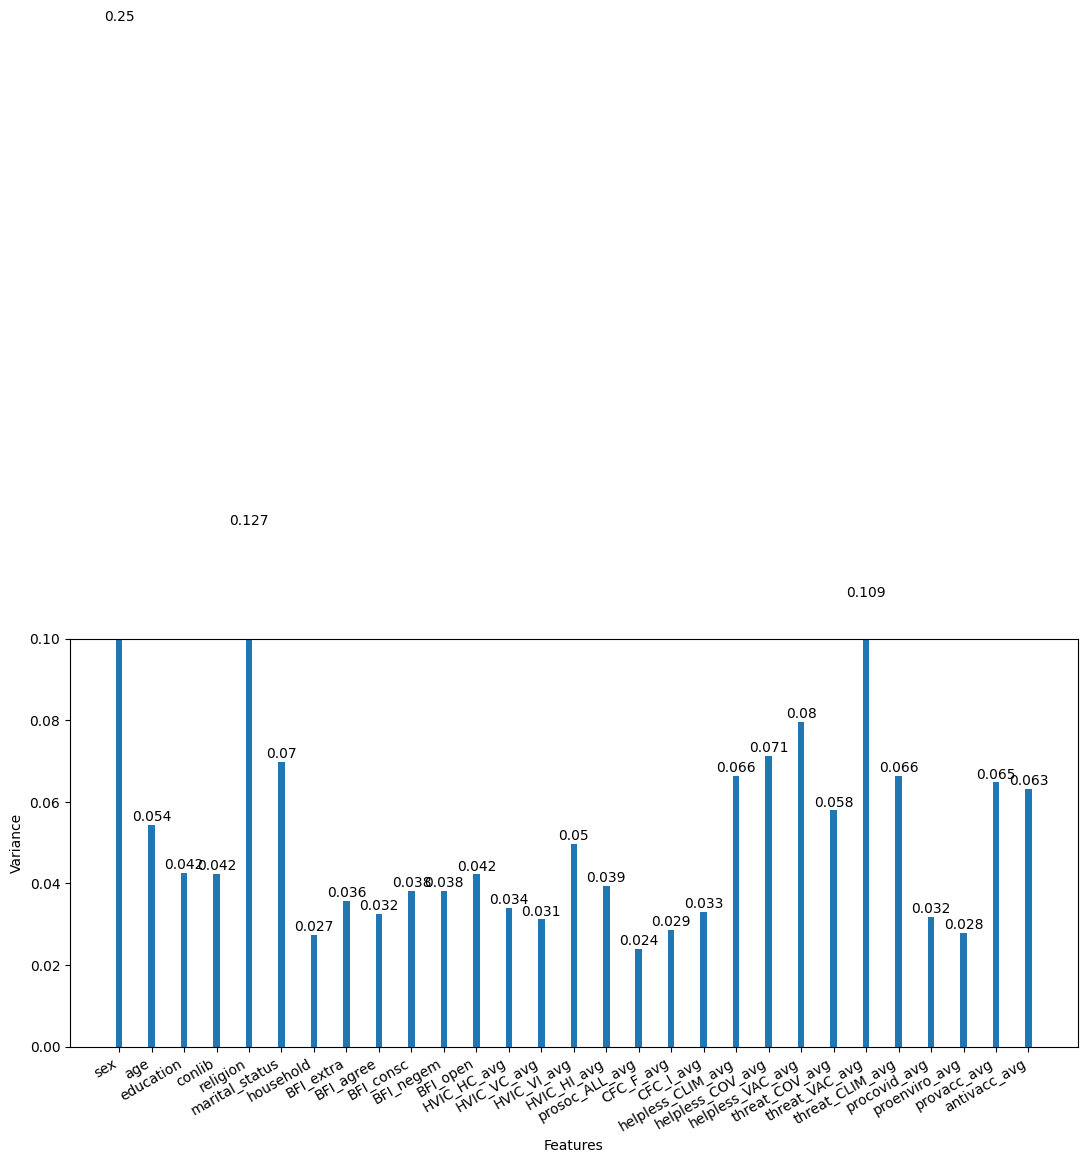

In [ ]:
#Plot the variance value of all the features
fig, ax = plt.subplots(figsize=(13, 6))

x= X.columns
y1= X_train_v1.var(axis=0)

ax.bar(x, y1, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for index, value in enumerate(y1):
  plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

fig.autofmt_xdate()
#plt.tight_layout()

We see some feature have high variance value and some feature have low variance value. If we take a threshold value like .035 and train the model with that feature then we should get good reasult on testing set.

#**Creating new dataframe new_df2 using important feature**

In [ ]:
#Now make a new dataframe which threshold value is more than .035
new_df2 = new_df[['sex','age','education','conlib','religion','marital_status','BFI_extra','BFI_consc','BFI_negem','BFI_open','HVIC_VI_avg','HVIC_HI_avg','helpless_CLIM_avg','helpless_COV_avg','helpless_VAC_avg','threat_COV_avg','threat_VAC_avg','threat_CLIM_avg','provacc_avg','antivacc_avg','vacc_emo_avg']]

In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                500 non-null    float64
 1   age                500 non-null    float64
 2   education          500 non-null    float64
 3   conlib             500 non-null    float64
 4   religion           500 non-null    float64
 5   marital_status     500 non-null    float64
 6   BFI_extra          500 non-null    float64
 7   BFI_consc          500 non-null    float64
 8   BFI_negem          500 non-null    float64
 9   BFI_open           500 non-null    float64
 10  HVIC_VI_avg        500 non-null    float64
 11  HVIC_HI_avg        500 non-null    float64
 12  helpless_CLIM_avg  500 non-null    float64
 13  helpless_COV_avg   500 non-null    float64
 14  helpless_VAC_avg   500 non-null    float64
 15  threat_COV_avg     500 non-null    float64
 16  threat_VAC_avg     500 non

In [ ]:
#To check the null values
new_df2.isnull().sum()

sex                  0
age                  0
education            0
conlib               0
religion             0
marital_status       0
BFI_extra            0
BFI_consc            0
BFI_negem            0
BFI_open             0
HVIC_VI_avg          0
HVIC_HI_avg          0
helpless_CLIM_avg    0
helpless_COV_avg     0
helpless_VAC_avg     0
threat_COV_avg       0
threat_VAC_avg       0
threat_CLIM_avg      0
provacc_avg          0
antivacc_avg         0
vacc_emo_avg         0
dtype: int64

##**Creating heatmap for the selected feature(21 columns)**

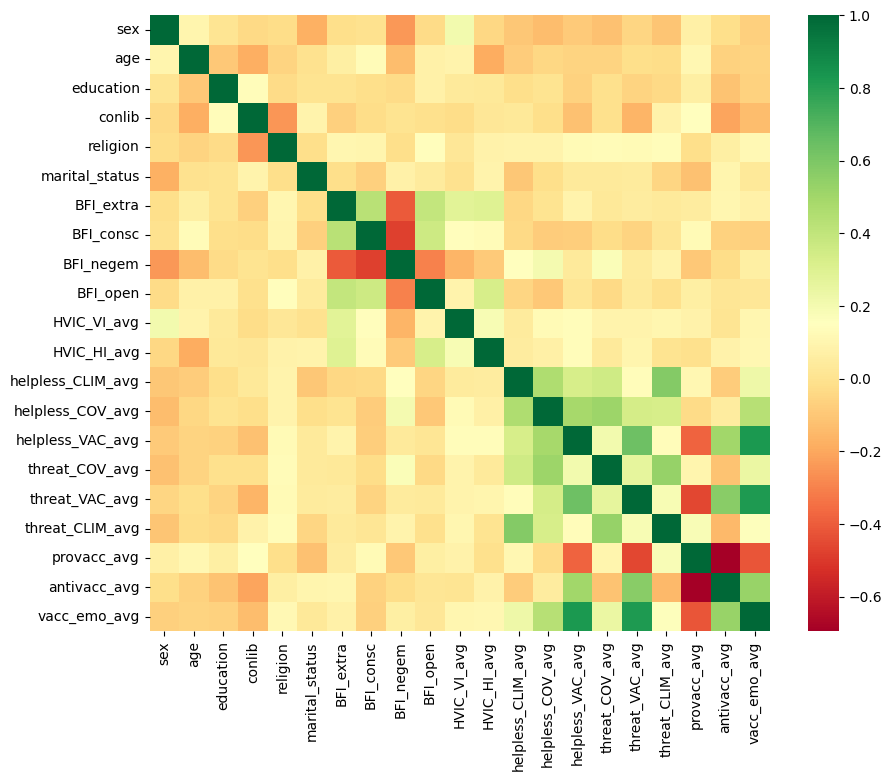

In [ ]:
# Create a heatmap for the selected feature with a figure size of 10x8 inches
correlation = new_df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap="RdYlGn")
plt.show()

#**Now split the dataframe into train and test**

In [ ]:
#Now split dataset into train test\

X2 = new_df2.drop(['vacc_emo_avg'], axis=1)
y2 = new_df2['vacc_emo_avg']

##**K-Fold cross validation apply on new dataframe new_df2**

**Prepare data for cross validation**

In [ ]:
#Convert X, y into numpy array
X3 = np.asarray(X2)
Y3 = np.asarray(y2)

###**For 5 fold cross validation**

In [ ]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True) # k=5 splits the data into 5 equal parts

In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNeighborClassifier',
             'Decision Tree','Random forest', 'Naive Bayes', 'Gradient Boosting']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42),
        GaussianNB(),
        GradientBoostingClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X3, Y3, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(round(cv_result.mean(), 4))  # Rounding to 4 decimal places
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Gradient Boosting,0.980
Decision Tree,0.952
Naive Bayes,0.940
Linear Svm,0.934
Random forest,0.930
Logistic Regression,0.912
Radial Svm,0.906
KNeighborClassifier,0.776


***************

###**For 10 fold cross validation**

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNeighborClassifier',
             'Decision Tree','Random forest', 'Naive Bayes', 'Gradient Boosting']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42),
        GaussianNB(),
        GradientBoostingClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X3, Y3, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(round(cv_result.mean(), 4))  # Rounding to 4 decimal places
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Gradient Boosting,0.982
Decision Tree,0.956
Random forest,0.932
Linear Svm,0.930
Naive Bayes,0.930
Logistic Regression,0.918
Radial Svm,0.914
KNeighborClassifier,0.790


*************

###**For 15 fold cross validation**

In [ ]:
kfold = KFold(n_splits=15, random_state=42, shuffle=True) # k=15 splits the data into 15 equal parts

In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNeighborClassifier',
             'Decision Tree','Random forest', 'Naive Bayes', 'Gradient Boosting']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=42),
        GaussianNB(),
        GradientBoostingClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X3, Y3, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(round(cv_result.mean(), 4))  # Rounding to 4 decimal places
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Gradient Boosting,0.9839
Decision Tree,0.9581
Linear Svm,0.9381
Random forest,0.9342
Naive Bayes,0.9323
Logistic Regression,0.9102
Radial Svm,0.9023
KNeighborClassifier,0.7784


**Put accuracy score and make a box plot**

In [ ]:
#Creating a dataframe
box=pd.DataFrame(accuracy,index=[classifiers])

#Transpose the dataframe
boxT = box.T

<ipython-input-168-279be4b43f20>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classifiers)


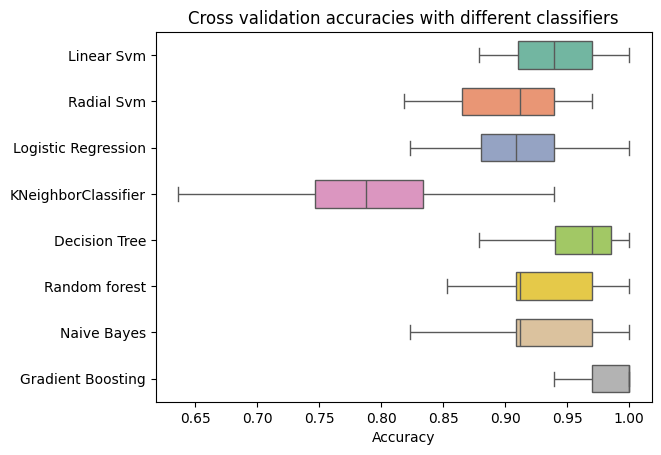

In [ ]:
#Creating box plot
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

## **Compare different model accuracies using new-df2**

**Split new_df2 dataset into train and test ratio is 85% and 15%**

In [ ]:
#Split the dataset into 85/15
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.15, stratify=y, random_state = 42)

In [ ]:
#Now check the shape of each part
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(425, 20)
(425,)
(75, 20)
(75,)


********************

In [ ]:
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X2_train, y2_train)
    prediction = model.predict(X2_test)
    accuracy_scores.append(round(metrics.accuracy_score(prediction, y2_test), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Gradient Boosting,0.9733
Decision Tree,0.9200
Linear Svm,0.8933
Random forest,0.8933
Logistic Regression,0.8800
Radial Svm,0.8667
Naive Bayes,0.8533
KNeighborsClassifier,0.8267


**********

**Split new_df2 dataset into train and test ratio is 80% and 20%**

In [ ]:
#Split the dataset into 80/20
X2_train1, X2_test1, y2_train1, y2_test1 = train_test_split(X2, y2, test_size = 0.2, stratify=y, random_state = 42)

In [ ]:
#Now check the shape of each part
print(X2_train1.shape)
print(y2_train1.shape)
print(X2_test1.shape)
print(y2_test1.shape)

(400, 20)
(400,)
(100, 20)
(100,)


In [ ]:
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X2_train1, y2_train1)
    prediction1 = model.predict(X2_test1)
    accuracy_scores.append(round(metrics.accuracy_score(prediction1, y2_test1), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Gradient Boosting,0.97
Random forest,0.93
Linear Svm,0.92
Radial Svm,0.92
Decision Tree,0.92
Logistic Regression,0.91
Naive Bayes,0.89
KNeighborsClassifier,0.86


*****************

**Split new_df2 dataset into train and test ratio is 70% and 30%**

In [ ]:
#Split the dataset into 80/20
X2_train2, X2_test2, y2_train2, y2_test2 = train_test_split(X2, y2, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
#Now check the shape of each part
print(X2_train2.shape)
print(y2_train2.shape)
print(X2_test2.shape)
print(y2_test2.shape)

(350, 20)
(350,)
(150, 20)
(150,)


In [ ]:
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X2_train2, y2_train2)
    prediction2 = model.predict(X2_test2)
    accuracy_scores.append(round(metrics.accuracy_score(prediction2, y2_test2), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Gradient Boosting,0.9733
Random forest,0.9333
Decision Tree,0.9067
Linear Svm,0.9000
Naive Bayes,0.8867
Radial Svm,0.8733
Logistic Regression,0.8733
KNeighborsClassifier,0.8067


********************

##**Gradiant Boosting Classifier with 21 features**

In [ ]:
#Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

#Train classifier using all features
gbc.fit(X2_train, y2_train)

#Make predictions
y_pred_gbc2 = gbc.predict(X2_test)

#Evaluate the model using the f1-score
f1_score_y_test_gbc2 = round(f1_score(y2_test, y_pred_gbc2, average='weighted'), 4)

In [ ]:
# Make predictions on the training data
y_pred_train_gbc2 = gbc.predict(X2_train)

# Evaluate the model using the f1-score
f1_score_y_train_gbc2 = round(f1_score(y2_train, y_pred_train_gbc2, average='weighted'), 4)

**Classification report:**


In [ ]:
#To creat a classification report
print(classification_report(y2_test, y_pred_gbc2))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.95      1.00      0.98        41
           3       1.00      0.94      0.97        16

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y2_test, y_pred_gbc2)
cm

array([[17,  1,  0],
       [ 0, 41,  0],
       [ 0,  1, 15]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y2_test, y_pred_gbc2)
rmse = np.sqrt(mse)
print('Test set rmse score applying on GradientBoostingClassifier: {:.4f}'.format(rmse))

Test set rmse score applying on GradientBoostingClassifier: 0.1633


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using GradientBoostingClassifier: {:.4f}'.format(f1_score_y_train_gbc2))
print('Test set f1 score using GradientBoostingClassifier: {:.4f}'.format(f1_score_y_test_gbc2))

Train set f1 score using GradientBoostingClassifier: 1.0000
Test set f1 score using GradientBoostingClassifier: 0.9732


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using GradientBoostingClassifier : {:.4f}'.format(accuracy_score(y2_train, y_pred_train_gbc2)))
print('Test set score using GradientBoostingClassifier : {:.4f}'.format(accuracy_score(y2_test, y_pred_gbc2)))

Train set score using GradientBoostingClassifier : 1.0000
Test set score using GradientBoostingClassifier : 0.9733


As the f1_score is closer to 1, so the model is good.

****************

##**DecisionTreeClassifier with 21 features**

In [ ]:
#Setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
#The Gini impurity measure is one of the methods used in decision tree algorithms to decide the optimal split from a root node, and subsequent splits.
dtc_gini = DecisionTreeClassifier(max_depth=7, random_state=42)

#Train classifier using all features
dtc_gini.fit(X2_train, y2_train)

# Getting some predictions from the testing set
y_pred_dtc2 = dtc_gini.predict(X2_test)

#Evaluate the model using the f1-score
f1_score_y_test_dtc2 = round(f1_score(y2_test, y_pred_dtc2, average='weighted'), 4)

In [ ]:
# Getting some predictions from the training set
y_pred_train_dtc2 = dtc_gini.predict(X2_train)

# Evaluate the model using the f1-score
f1_score_y_train_dtc2 = round(f1_score(y2_train, y_pred_train_dtc2, average='weighted'), 4)

**Classification report:**

In [ ]:
#To creat a classification report
print(classification_report(y2_test, y_pred_dtc2))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           2       0.87      1.00      0.93        41
           3       1.00      0.75      0.86        16

    accuracy                           0.92        75
   macro avg       0.96      0.88      0.91        75
weighted avg       0.93      0.92      0.92        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y2_test, y_pred_dtc2)
cm

array([[16,  2,  0],
       [ 0, 41,  0],
       [ 0,  4, 12]])

**Error function**

In [ ]:
#To find the rmse
mse = metrics.mean_squared_error(y2_test, y_pred_dtc2)
rmse = np.sqrt(mse)
print('Test set rmse score applying on decessiontreeclassifier: {:.4f}'.format(rmse))

Test set rmse score applying on decessiontreeclassifier: 0.2828


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using KNeighborsClassifier: {:.4f}'.format(f1_score_y_train_dtc2))
print('Test set f1 score using KNeighborsClassifier: {:.4f}'.format(f1_score_y_test_dtc2))

Train set f1 score using KNeighborsClassifier: 1.0000
Test set f1 score using KNeighborsClassifier: 0.9181


**Accuracy score**

In [ ]:
#Print the accuracy scores of train and test set

print('Training set accuracy score decessiontreeclassifier: {:.4f}'.format(accuracy_score(y2_train, y_pred_train_dtc2)))
print('Test set accuracy score decessiontreeclassifier: {:.4f}'.format(accuracy_score(y2_test, y_pred_dtc2)))

Training set accuracy score decessiontreeclassifier: 1.0000
Test set accuracy score decessiontreeclassifier: 0.9200


********************

##**SVM with 21 features**

In [ ]:
#High gamma value increase the acuracy and high c value add some value to error function to improve the reasult
classifier = svm.SVC(kernel="linear", gamma=15, C=7)
classifier.fit(X2_train, y2_train)

#Make predictions
y_pred_svc2 = classifier.predict(X2_test)

#Evaluate the model using the f1-score
f1_score_y_test_svc2 = round(f1_score(y2_test, y_pred_svc2, average='weighted'), 4)

In [ ]:
#Predict the accuracy of train set
y_pred_train_svc2 = classifier.predict(X2_train)

# Evaluate the model using the f1-score
f1_score_y_train_svc2 = round(f1_score(y2_train, y_pred_train_svc2, average='weighted'), 4)

**Classification report:**

In [ ]:
#To creat a classification report

print(classification_report(y2_test, y_pred_svc2))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        18
           2       0.87      0.95      0.91        41
           3       1.00      0.75      0.86        16

    accuracy                           0.89        75
   macro avg       0.92      0.86      0.88        75
weighted avg       0.90      0.89      0.89        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix

cm = confusion_matrix(y2_test, y_pred_svc2)
cm

array([[16,  2,  0],
       [ 2, 39,  0],
       [ 0,  4, 12]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y2_test, y_pred_svc2)
rmse = np.sqrt(mse)
print('Test set rmse score applying on svc: {:.4f}'.format(rmse))

Test set rmse score applying on svc: 0.3266


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using svc: {:.4f}'.format(f1_score_y_train_svc2))
print('Test set f1 score using svc: {:.4f}'.format(f1_score_y_test_svc2))

Train set f1 score using svc: 0.9905
Test set f1 score using svc: 0.8920


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using svc: {:.4f}'.format(metrics.accuracy_score(y2_train, y_pred_train_svc2)))
print('Test set score using svc: {:.4f}'.format(metrics.accuracy_score(y2_test, y_pred_svc2)))

Train set score using svc: 0.9906
Test set score using svc: 0.8933


*****************************

##**Naive Bayes Classifier with 21 features**

In [ ]:
#Initialize classifier
gnb = GaussianNB()

#Train classifier using all features
gnb.fit(X2_train, y2_train)

#Make predictions
y_pred_gnb2 = gnb.predict(X2_test)

#Evaluate the model using the f1-score
f1_score_y_test_gnb2 = round(f1_score(y2_test, y_pred_gnb2, average='weighted'), 4)

In [ ]:
# Make predictions on the training data
y_pred_train_gnb2 = gnb.predict(X2_train)

#Evaluate the model using the f1-score
f1_score_y_train_gnb2 =round(f1_score(y2_train, y_pred_train_gnb2, average='weighted'), 4)

**Classification report:**


In [ ]:
#To creat a classification report
print(classification_report(y2_test, y_pred_gnb2))

              precision    recall  f1-score   support

           1       0.88      0.83      0.86        18
           2       0.86      0.88      0.87        41
           3       0.81      0.81      0.81        16

    accuracy                           0.85        75
   macro avg       0.85      0.84      0.85        75
weighted avg       0.85      0.85      0.85        75



**Confusion matrix:**

In [ ]:
#To create a confusion matrix
cm = confusion_matrix(y2_test, y_pred_gnb2)
cm

array([[15,  3,  0],
       [ 2, 36,  3],
       [ 0,  3, 13]])

**Error function**

In [ ]:
#To find the rmse

mse = metrics.mean_squared_error(y2_test, y_pred_gnb2)
rmse = np.sqrt(mse)
print('Test set rmse score applying on GaussianNaiveBayes: {:.4f}'.format(rmse))

Test set rmse score applying on GaussianNaiveBayes: 0.3830


**F1-Score**

In [ ]:
#Find the train and test set f1_score

print('Train set f1 score using GaussianNaiveBayes: {:.4f}'.format(f1_score_y_train_gnb2))
print('Test set f1 score using GaussianNaiveBayes: {:.4f}'.format(f1_score_y_test_gnb2))

Train set f1 score using GaussianNaiveBayes: 0.9503
Test set f1 score using GaussianNaiveBayes: 0.8533


**Accuracy score**

In [ ]:
#To find the train and test set score

print('Train set score using GaussianNaiveBayes : {:.4f}'.format(accuracy_score(y2_train, y_pred_train_gnb2)))
print('Test set score using GaussianNaiveBayes : {:.4f}'.format(accuracy_score(y2_test, y_pred_gnb2)))

Train set score using GaussianNaiveBayes : 0.9506
Test set score using GaussianNaiveBayes : 0.8533


***********************

#**Validation dataset**

**Load the validate dataset**

In [ ]:
#load the dataset
df2=pd.read_csv('/content/drive/MyDrive/Test_education/Thesis Project/Final documents/Preprocessed_validatation_dataset.csv')

In [ ]:
df2.head()

,sex,age,education,conlib,religion,marital_status,household,BFI_extra,BFI_agree,BFI_consc,...,helpless_COV_avg,helpless_VAC_avg,threat_COV_avg,threat_VAC_avg,threat_CLIM_avg,procovid_avg,proenviro_avg,provacc_avg,antivacc_avg,vacc_emo_avg
0,1.0,0.314286,0.666667,0.666667,1.0,0.0,0.111111,0.75,1.00,1.00,...,0.666667,0.666667,0.833333,0.666667,0.833333,1.00,1.00,1.0,0.75,1
1,0.0,0.057143,0.666667,0.333333,1.0,0.5,0.444444,0.25,1.00,1.00,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.00,1.00,1.0,0.75,3
2,1.0,0.342857,0.666667,0.666667,1.0,0.0,0.222222,0.75,1.00,1.00,...,0.500000,0.833333,0.833333,0.000000,0.500000,0.75,0.50,1.0,1.00,2
3,1.0,0.371429,0.666667,0.500000,1.0,0.5,0.222222,0.50,1.00,1.00,...,0.500000,0.500000,0.500000,0.000000,0.500000,1.00,0.50,1.0,1.00,2
4,1.0,0.314286,0.333333,0.500000,1.0,0.0,0.222222,0.75,0.75,0.25,...,0.333333,1.000000,0.000000,0.500000,1.000000,1.00,0.25,1.0,0.50,1


In [ ]:
#Now split dataset into train test

X4 = df2.drop(['vacc_emo_avg'], axis=1)
y4 = df2['vacc_emo_avg']

In [ ]:
#Train dataset that split into 85:15 ratio contains 30 features
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X_train, y_train)
    prediction = model.predict(X4)
    accuracy_scores.append(round(metrics.accuracy_score(prediction, y4), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
KNeighborsClassifier,0.4583
Linear Svm,0.4375
Logistic Regression,0.4375
Random forest,0.4375
Radial Svm,0.4167
Decision Tree,0.4167
Gradient Boosting,0.3958
Naive Bayes,0.3958


In [ ]:
#Train dataset that contains all rows and columns all 30 features
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X, y)
    prediction = model.predict(X4)
    accuracy_scores.append(round(metrics.accuracy_score(prediction, y4), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Radial Svm,0.4583
KNeighborsClassifier,0.4583
Linear Svm,0.4375
Logistic Regression,0.4375
Naive Bayes,0.4167
Gradient Boosting,0.3958
Random forest,0.3958
Decision Tree,0.3750


****************

In [ ]:
#Now make a new dataframe which threshold value is more than .035
df3 = df2[['sex','age','education','conlib','religion','marital_status','BFI_extra','BFI_consc','BFI_negem','BFI_open','HVIC_VI_avg','HVIC_HI_avg','helpless_CLIM_avg','helpless_COV_avg','helpless_VAC_avg','threat_COV_avg','threat_VAC_avg','threat_CLIM_avg','provacc_avg','antivacc_avg','vacc_emo_avg']]

In [ ]:
#Now split dataset into train test

X5 = df3.drop(['vacc_emo_avg'], axis=1)
y5 = df3['vacc_emo_avg']

In [ ]:
#Dataset that split into 85:15 ratio contains 21 features
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X2_train, y2_train)
    prediction = model.predict(X5)
    accuracy_scores.append(round(metrics.accuracy_score(prediction, y5), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
KNeighborsClassifier,0.5000
Logistic Regression,0.4792
Naive Bayes,0.4583
Linear Svm,0.4375
Radial Svm,0.4167
Gradient Boosting,0.3958
Random forest,0.3958
Decision Tree,0.3542


In [ ]:
#Train dataset that contains all rows and columns all 21 features
accuracy_scores=[]
classifiers=['Gradient Boosting','Linear Svm','Radial Svm','Logistic Regression',
            'KNeighborsClassifier','Decision Tree', 'Random forest', 'Naive Bayes']

models=[GradientBoostingClassifier(max_depth=5, random_state=42),
        svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0),
        GaussianNB()]

for i in models:
    model = i
    model.fit(X2, y2)
    prediction = model.predict(X5)
    accuracy_scores.append(round(metrics.accuracy_score(prediction, y5), 4))  # Round to 4 decimal places

models_dataframe=pd.DataFrame(accuracy_scores, index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
KNeighborsClassifier,0.5000
Naive Bayes,0.4583
Linear Svm,0.4375
Logistic Regression,0.4167
Random forest,0.4167
Gradient Boosting,0.3958
Radial Svm,0.3958
Decision Tree,0.3750


#**Result**

We use six different type of machine learning model on the emotional drivers dataset. We also use three different type of accuracy metric to calculate the accuracy of our prediction. To get the highest accuracy we normalize our dataset before it fed the model.
we use

*   K-Fold cross validation
        Accuracy score using GradientBoostingClassifier(): 0.9136
        Accuracy score using SVC()                       : 0.8409
        Accuracy score using LinearRegression()          : 0.8162
        Accuracy score using RandomForestClassifier()    : 0.7908
        Accuracy score using LogisticRegression()        : 0.7634
        Accuracy score using KNeighborsRegressor()       : 0.6131
        Accuracy score using KNeighborsClassifier()      : 0.5000


After spliting the dataset into 85:15 we use this in five different model. And get different train test accuracy.
        

*   Gradient Boosting Classifier
        Traning set accuracy: 1.0000
        Test set accuracy   : 0.9733
        rmse score          : 0.1633

*   Decision Tree Classifier
        Traning set accuracy: 1.0000
        Test set accuracy   : 0.9200

*   Support Vector Classifier
        Traning set accuracy: 0.9859
        Test set accuracy   : 0.9200

*   KNeighbours Classifier
        Traning set accuracy: 0.8447
        Test set accuracy   : 0.8133

*   Random Forest Classifier
        Traning set accuracy: 0.9906
        Test set accuracy   : 0.8800

*   Gaussian Naive Bayes Classifier
        Traning set accuracy: 0.9247
        Test set accuracy   : 0.9067


After hyper parameter tuning we get

*   Support Vector Classifier
        Traning set accuracy: 0.9859
        Test set accuracy   : 0.9467

*   Random Forest Classifier
        Traning set accuracy: 1.0000
        Test set accuracy   : 0.9200


To predict the accuracy of the dataset(test and train) we use

1.   f1_score
2.   accuracy_score
3.   cross_val score

We also generate classification report and also confusion matrix for all the model.

We also use Root mean squared error funtion to calculate the error in the dataset.

We apply hyper parameter tuning on SVC and RandomForestClassification model but we don't get any good results.

After this to improve the models accuracy we use feature selection tecnique
to seperate the imprtant feature from the less imprtant feature and use this new dataframe on Decission tree classifier and K-fold cross validation model and we get a little improvement on the accuracy score.


*   Gradient Boosting Classifier
        Traning set accuracy: 1.0000
        Test set accuracy   : 0.9867

*   Decision Tree Classifier
        Traning set accuracy: 1.0000
        Test set accuracy   : 0.9067

*   Support Vector Classifier
        Traning set accuracy: 0.9859
        Test set accuracy   : 0.9200

*   Gaussian Naive Bayes Classifier
        Traning set accuracy: 0.9365
        Test set accuracy   : 0.9067

*   K-Fold cross validation
        Accuracy score using GradientBoostingClassifier(): 0.9136
        Accuracy score using SVC()                       : 0.8633
        Accuracy score using LinearRegression()          : 0.8169
        Accuracy score using RandomForestClassifier()    : 0.8134
        Accuracy score using LogisticRegression()        : 0.7908
        Accuracy score using KNeighborsRegressor()       : 0.6420        
        Accuracy score using KNeighborsClassifier()      : 0.5685


From all the accuracy we see when we use Gradient Boosting Classifier on our first selected data frame then we get the train set accuracy(1.0000) and test set accuracy(0.9733).After that we apply feature selection tecnique and run different model and they perform little better in this time Gradient Boosting Classifier give us the best result train set accuracy(1.0000) and test set accuracy(0.9867).
